# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1: полносвязные сети

**ФИО:** Васюков Александр Владимирович

**Факт о себе:** Прошлой осенью играли в футбол в Кубке Универов за "ФК Н". Оказывается, там после каждого матча отмечался лучший игрок. И вот спустя год я узнал, что становился лучшим во всех 3 играх, в которых играл, даже в том матче, где проиграли.

А ещё я забивал во всех матчах, в которых играл: 7 матчей, 16 голов.


## Общая информация

__Дата выдачи:__ 22.09.2025

__Мягкий дедлайн:__ 23:59MSK 12.10.2025

__Жесткий дедлайн:__ 23:59MSK 19.10.2025


## Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).  Если два студента сгенерировали в нейронке одинаковые либо похожие решения, это считается плагиатом и приводит к обнулению обеих работ.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как

$$
min(part_1, part_2) \cdot 0.6 + max(part_1, part_2) \cdot 0.2 + part_3 \cdot 0.2
$$

где $part_1$, $part_2$ и $part_3$ - оценки за первую, вторую и третью части работы

> Также, за домашнее задание выставляется 0, если не сделано нулевое задание либо нет подробного описания ваших экспериментов в третьей части.

## Оформление

1. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
2. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
3. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

Из каждого проведённого эксперимента делайте выводы и фиксируйте их. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/king.png" width="300">
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/bad_lines.png" width="600">
</center>

## О задании

Вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

import pandas as pd
import numpy as np
import random
import os

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Установим тему из библиотеки seaborn, чтобы графики красиво отрисовывались.

In [3]:
sns.set_theme(palette="bright")

Начнем с того, что скачаем и загрузим данные:

In [5]:
if not os.path.exists("yearpredictionmsd.zip"):
    !wget -O yearpredictionmsd.zip https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip

--2025-10-10 23:01:59--  https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘yearpredictionmsd.zip’

yearpredictionmsd.z     [              <=>   ] 201.24M  18.7MB/s    in 12s     

2025-10-10 23:02:12 (16.4 MB/s) - ‘yearpredictionmsd.zip’ saved [211011981]



In [6]:
df = pd.read_csv('yearpredictionmsd.zip', header=None)
df.head()

0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87        88         89        90  
0 -23.08793   68.40795  -1.82223  -27.46348   2.26327  
1 -32.22788   70.49388  12.04941   58.43453  26.92061  
2  43.20130 -115.00698  -0.05859   39.67068  -0.66345  
3  82.58061  -72.08993   9.90558  199.62971  18.85382  
4  -7.50035   51.76631   7.88713   55.66926  28.74903  

[5 rows x 91 columns]

Посмотрим на статистики по данным.

In [40]:
df.describe()

0              1              2              3   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.387126       1.289554       8.658347   
std        10.931046       6.067558      51.580351      35.268585   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      61.970140     384.065730     322.851430   

                  4              5              6              7   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        1.164124      -6.553601      -9.521975      -2.391089   
std        16.322790      22.860785      12.857751      14.571873   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487500     -20.666450     -18.440990     -10.780600   
50%        -0.652840      -6.007770     -11.188390      -2.046670   
75%         8.787540       7.741870      -2.388960       6.508580   
max       335.771820     262.068870     166.236890     172.402680   

                  8              9   ...             81             82  \
count  515345.000000  515345.000000  ...  515345.000000  515345.000000   
mean       -1.793236       3.727876  ...      15.755406     -73.461500   
std         7.963827      10.582861  ...      32.099635     175.618889   
min       -72.503850    -126.479040  ...    -437.722030   -4402.376440   
25%        -6.468420      -2.293660  ...      -1.812650    -139.555160   
50%        -1.736450       3.822310  ...       9.171850     -53.090060   
75%         2.913450       9.961820  ...      26.274480      13.478730   
max       126.741270     146.297950  ...     840.973380    4469.454870   

                  83             84             85             86  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       41.542422      37.934119       0.315751      17.669213   
std       122.228799      95.050631      16.161764     114.427905   
min     -1810.689190   -3098.350310    -341.789120   -3168.924570   
25%       -20.986900      -4.669540      -6.781590     -31.580610   
50%        28.791060      33.623630       0.820840      15.598470   
75%        89.661770      77.785800       8.470990      67.794960   
max      3210.701700    1734.079690     260.544900    3662.065650   

                  87             88             89             90  
count  515345.000000  515345.000000  515345.000000  515345.000000  
mean      -26.315336       4.458641      20.035136       1.329105  
std       173.977336      13.346557     185.558247      22.088576  
min     -4319.992320    -236.039260   -7458.378150    -381.424430  
25%      -101.530300      -2.566090     -59.509270      -8.820210  
50%       -21.204120       3.117640       7.759730       0.053050  
75%        52.389330       9.967740      86.351610       9.679520  
max      2833.608950     463.419500    7393.398440     677.899630  

[8 rows x 91 columns]

Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

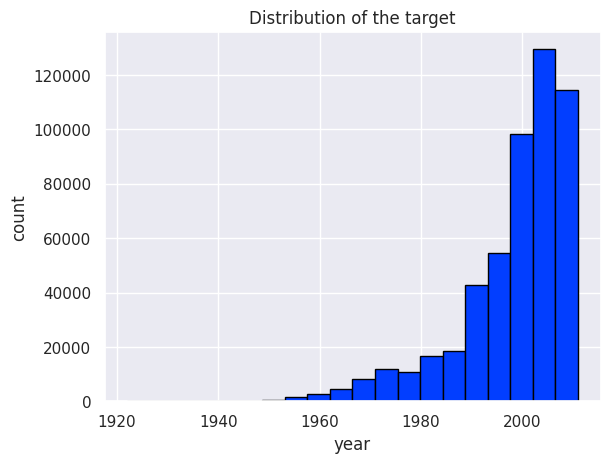

Range: 1922 - 2011
Unique values: 89


In [41]:
plt.hist(df.iloc[:, 0], bins=20, edgecolor='black')
plt.xlabel('year')
plt.ylabel('count')
plt.title("Distribution of the target")
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

X_train.shape, X_test.shape

((386508, 90), (128837, 90))

## Полезные советы:

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Если вы чего-то не знаете, не стесняйтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению и `pytorch`. Но не забывайте, что за списанный код без ссылки на источник последует наказание.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так.

- Пользуйтесь утилитами, которые вам предоставляет `pytorch` (например, `Dataset` и `Dataloader`). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего, вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

- При желании вы можете логгировать метрики обучения и свои эксперименты в WandB либо любой другой сервис. Не забудьте приложить к тетрадке ссылку на результаты экспериментов либо скришноты графиков с пояснениями, что проверяющий должен на них увидеть.

- Финальное значение тестовой метрики для удобства проверки выведите в тетрадке.

## Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями.
2. Обучите `StandertScaler` и предобработайте ваши данные. В следующих заданиях можете использовать другой `scaler` или вообще отказаться от него.


In [8]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = set_global_seed(8)

Отстандартизируем признаки с помощью StandardScaler.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим Ridge-модель.

In [10]:
model = Ridge()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
rmse_for_model = root_mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse_for_model:.4f}")

RMSE: 9.4736


Для `Ridge` $RMSE$ равен 9.4736

Лучшая константа для RMSE это среднее. Используйте среднее, расчитанное на трэйне в качестве прогноза для теста и посчитайте для такой наивной модели RMSE.

In [46]:
y_mean = y_train.mean()
best_rmse_metric = root_mean_squared_error(y_test, np.full_like(y_test, y_mean))
print(f"Constant RMSE: {best_rmse_metric:.4f}")

Constant RMSE: 10.8550


Для константы $RMSE$ равен 10.855

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию. Тестовую выборку мы будем использовать только для того, чтобы измерить итоговую метрику качества модели.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Часть I. Обучаем линейную регрессию (максимум 10 баллов)

**Задание 1 (10 баллов):** Обучите в `pytorch` линейную регрессию.

- Создайте модель линейной регрессии, которая будет состоять только из одного `Linear()` слоя.
   
- Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки `pytorch`. Для подсчета градиента воспользуйтесь методом backward.
   
- Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
   
- Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача &mdash; убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [12]:
# Переведем все в тензоры
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_val = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)

In [49]:
model = nn.Linear(in_features=90, out_features=1)

def MSE(y_target, y_pred):
    return ((y_target - y_pred) ** 2).mean()

learning_rate = 1e-10
n_epochs = 10

train_losses = []
val_losses = []
rmse_trains = []
rmse_vals = []

print(" Epoch  |  Train RMSE   | Val RMSE ")
print("--------|---------------|----------")

for epoch in range(n_epochs):
    out = model(X_train)
    loss = MSE(y_train, out)
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

    model.zero_grad()

    with torch.no_grad():
        y_pred_train = model(X_train)
        y_pred_val = model(X_val)

        train_loss = MSE(y_train, y_pred_train)
        val_loss = MSE(y_val, y_pred_val)

        train_rmse = root_mean_squared_error(y_train.numpy(), y_pred_train.numpy())
        val_rmse = root_mean_squared_error(y_val.numpy(), y_pred_val.numpy())

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        rmse_trains.append(train_rmse)
        rmse_vals.append(val_rmse)

    print(f" {epoch + 1}\t| {train_rmse:.0f}\t\t| {val_rmse:.0f}")

 Epoch  |  Train RMSE   | Val RMSE 
--------|---------------|----------
 1	| 2288		| 2287
 2	| 2281		| 2280
 3	| 2274		| 2273
 4	| 2266		| 2265
 5	| 2259		| 2258
 6	| 2252		| 2251
 7	| 2245		| 2244
 8	| 2237		| 2237
 9	| 2230		| 2229
 10	| 2223		| 2222


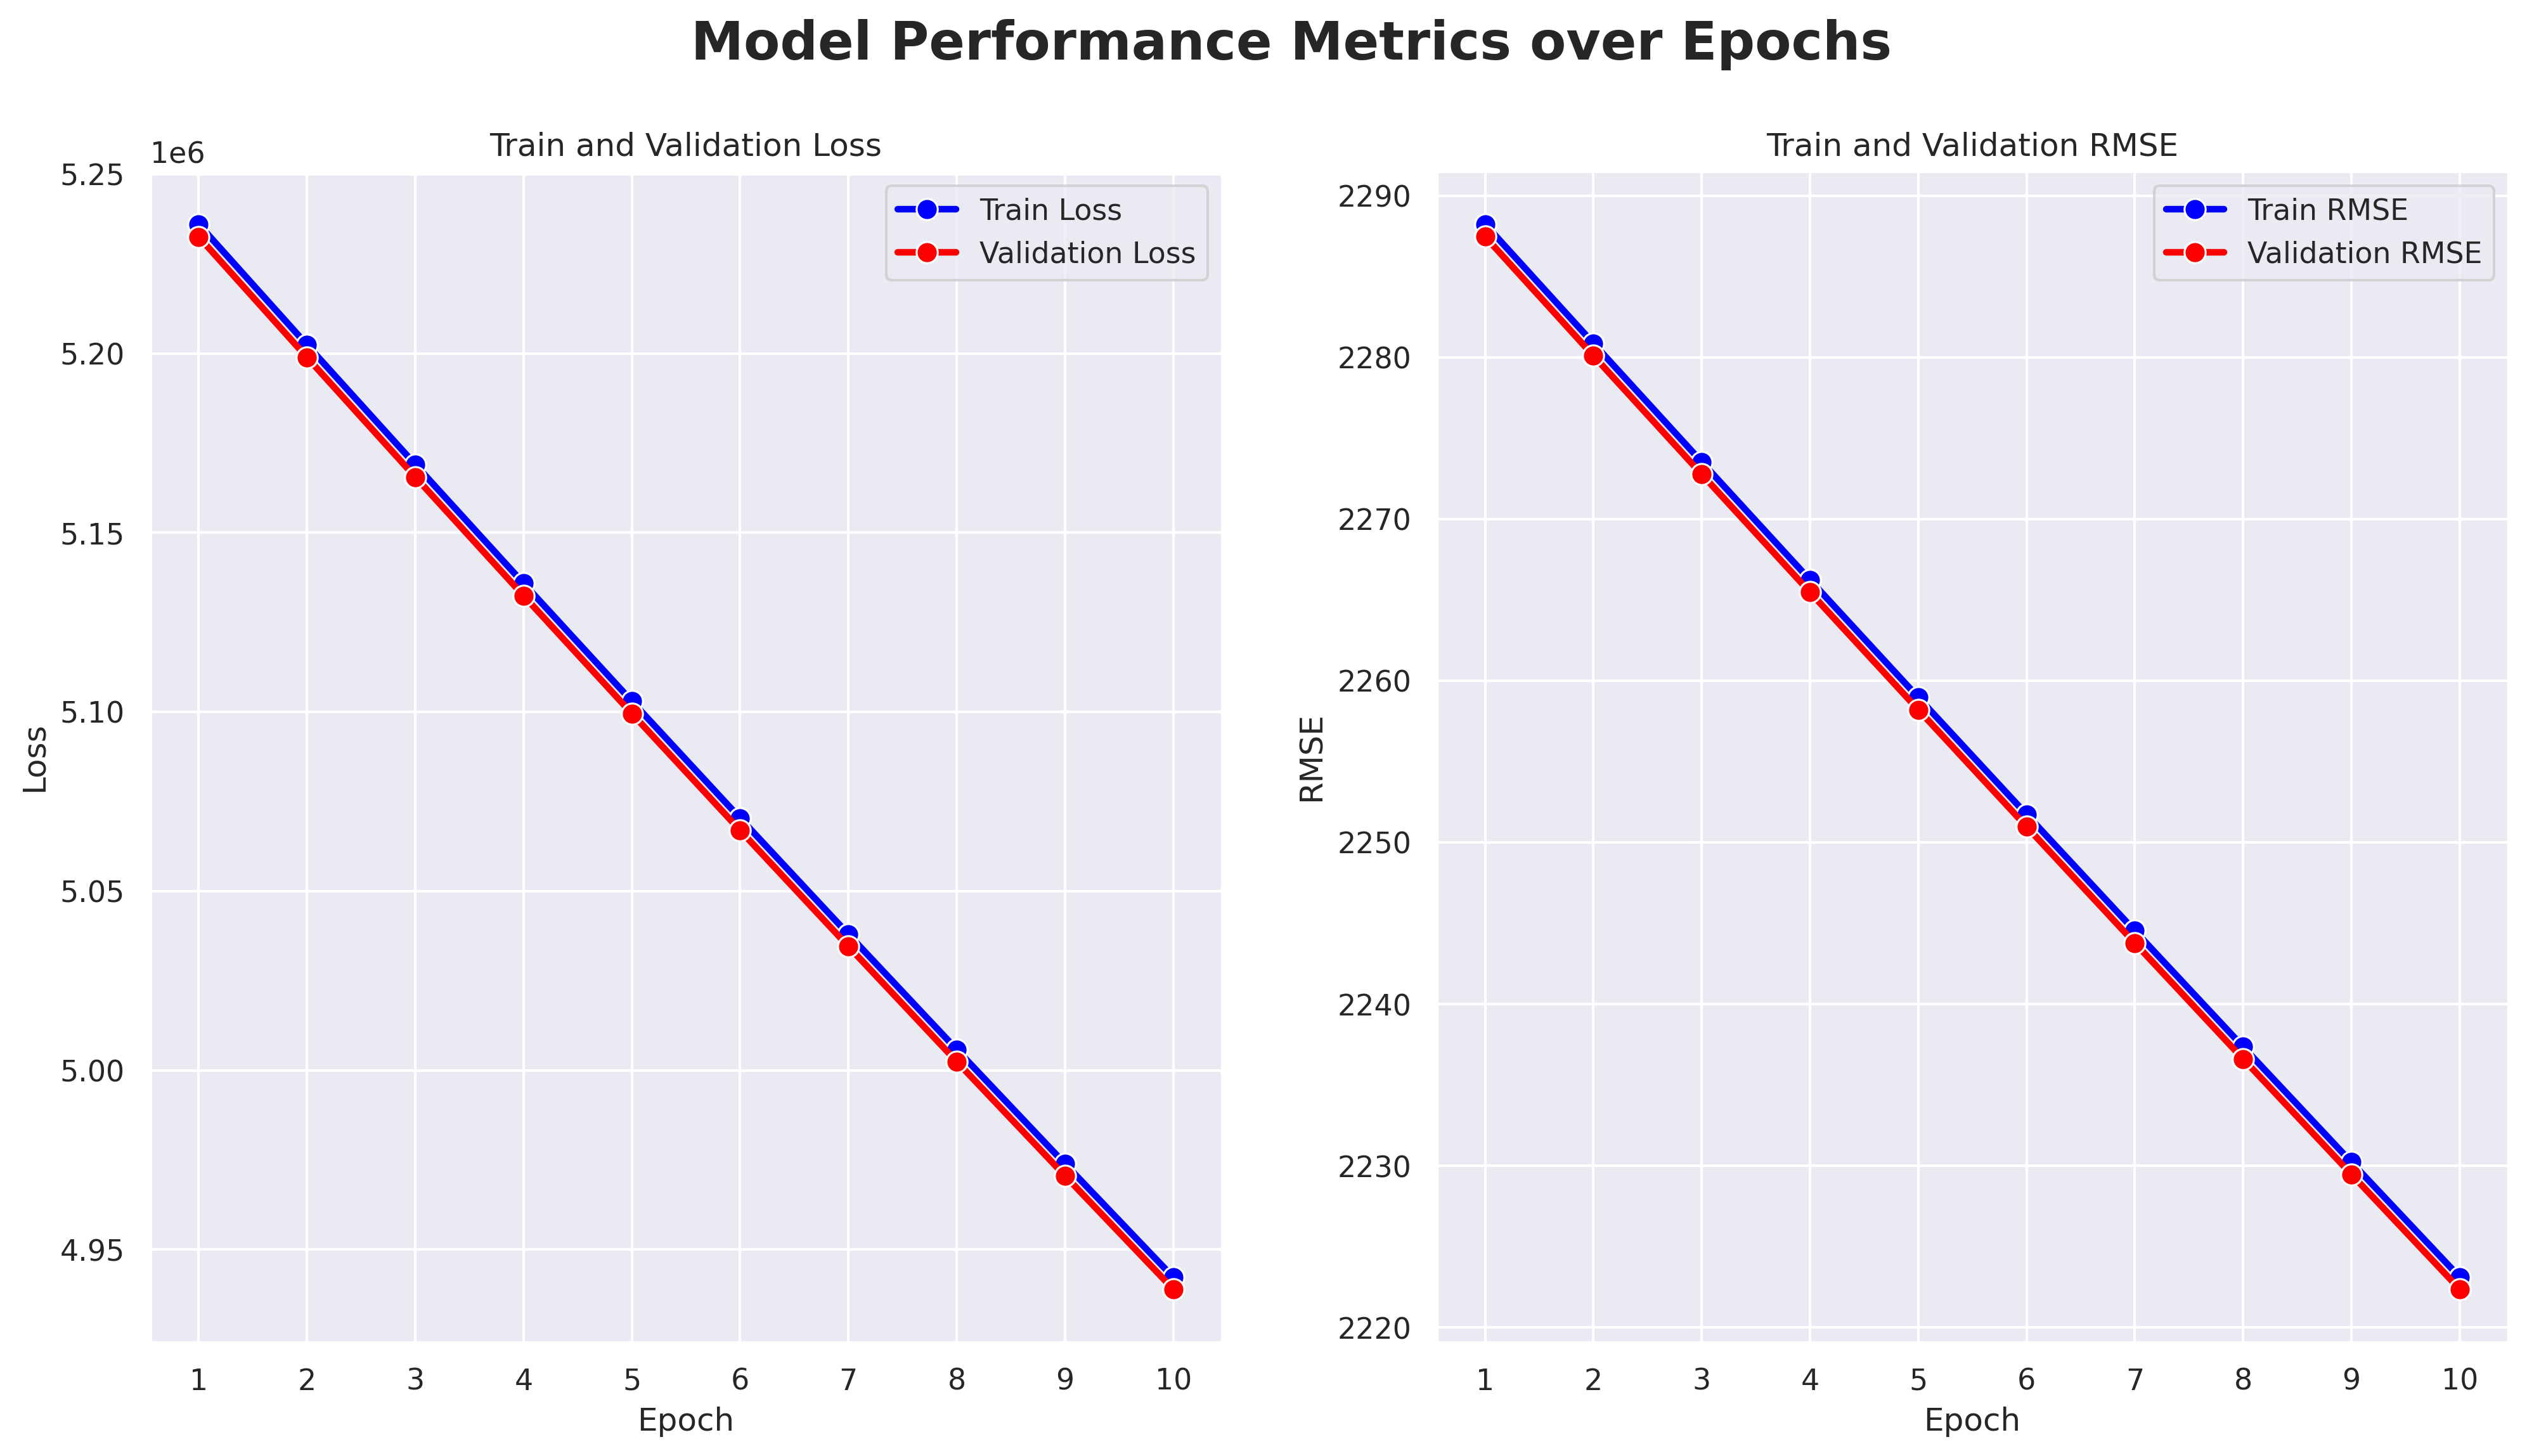

In [50]:
epochs = list(range(1, n_epochs + 1))

fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=300)

sns.lineplot(
    x=epochs, y=train_losses,
    marker='o', markersize=8,
    linewidth=2.5, color='blue',
    label='Train Loss',
    ax=axes[0]
)
sns.lineplot(
    x=epochs, y=val_losses,
    marker='o', markersize=8,
    linewidth=2.5, color='red',
    label='Validation Loss',
    ax=axes[0]
)
axes[0].set_title("Train and Validation Loss")
axes[0].set_xlabel("Epoch", fontsize=12)
axes[0].set_ylabel("Loss", fontsize=12)
axes[0].set_xticks(epochs)
axes[0].legend()

sns.lineplot(
    x=epochs, y=rmse_trains,
    marker='o', markersize=8,
    linewidth=2.5, color='blue',
    label='Train RMSE',
    ax=axes[1]
)
sns.lineplot(
    x=epochs, y=rmse_vals,
    marker='o', markersize=8,
    linewidth=2.5, color='red',
    label='Validation RMSE',
    ax=axes[1]
)
axes[1].set_title("Train and Validation RMSE")
axes[1].set_xlabel("Epoch", fontsize=12)
axes[1].set_ylabel("RMSE", fontsize=12)
axes[1].set_xticks(epochs)
axes[1].legend()

fig.suptitle("Model Performance Metrics over Epochs", fontsize=20, fontweight='bold')
plt.show()

**Вывод:** Параметров слишком мало, признаки не отмаштабированы и шаг обучения выбран наугад, поэтому результаты выглядят плачевными.

## Часть II. Заводим нейронную сеть (максимум 10 баллов)

Ниже нам предстоит реализовать довольно много различных нейросетей и поставить целую серию экспериментов. Чтобы это всё происходило без боли и страданий, нам нужно держать код в удобном виде.

При решении заданий вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. При необходимости вы можете добавить в них любые нужные вам аргументы и любой нужный функционал. Более того, хорошей практикой является не делать эти функции слишком громоздкими и выносить разные хитрые штуки в отдельные функции.

In [13]:
def training_epoch(model, optimizer, criterion, train_loader, device='cpu', is_classification=False):
    """ The train epoch
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        device - device for computing
        is_classification - type of prediction
    returns:
        tuple[float, float] - (average_loss, average_accuracy)
            - average_accuracy = 0.0 if `is_classification=False`.
    """
    model.train()
    loss_batches = []
    acc_batches = []

    for x_batch, y_batch in tqdm(train_loader, desc='training', leave=False):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward
        out = model(x_batch)
        loss = criterion(out, y_batch)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Metrics
        loss_batches.append(loss.item())
        if is_classification:
            acc = (out.argmax(dim=1) == y_batch).float().mean().item()
            acc_batches.append(acc)

    avg_loss = np.mean(loss_batches)
    avg_acc = np.mean(acc_batches) if is_classification and acc_batches else 0.0
    return avg_loss, avg_acc


@torch.no_grad()
def validation_epoch(model, criterion, val_loader, device='cpu', is_classification=False):
    """ The validation epoch
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
        device - device for computing
        is_classification - type of prediction
    returns:
        tuple[float, float] - (average_loss, average_accuracy)
            - average_accuracy = 0.0 if `is_classification=False`.
    """
    model.eval()
    loss_batches = []
    acc_batches = []

    for x_batch, y_batch in tqdm(val_loader, desc='validation', leave=False):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward
        out = model(x_batch)
        loss = criterion(out, y_batch)

        # Metrics
        loss_batches.append(loss.item())
        if is_classification:
            acc = (out.argmax(dim=1) == y_batch).float().mean().item()
            acc_batches.append(acc)

    avg_loss = np.mean(loss_batches)
    avg_acc = np.mean(acc_batches) if is_classification and acc_batches else 0.0
    return avg_loss, avg_acc


@torch.no_grad()
def predict(model, data_loader, device='cpu', is_classification=False):
    """ Prediction of model
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
        device - device for computing
        is_classification - type of prediction
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    model.eval()
    predictions = []

    for x_batch, _ in tqdm(data_loader, desc='predicting', leave=False):
        x_batch = x_batch.to(device)

        out = model(x_batch)
        if is_classification:
            pred = out.argmax(dim=1).cpu()
        else:
            pred = out.cpu().reshape(-1)
        predictions.append(pred)

    predicts = torch.cat(predictions, dim=0)
    return predicts


def train(model, optimizer, criterion, train_loader, val_loader, epochs, device='cpu', is_classification=False):
    """ Training of model
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
        epochs - number of training epochs
        device - device for computing
        is_classification - type of prediction
    returns:
        dict[str, list[float]]: A dictionary containing per-epoch training and validation statistics:
            - 'train_loss': list of average training losses.
            - 'train_acc': list of average training accuracies.
            - 'val_loss': list of average validation losses.
            - 'val_acc': list of average validation accuracies.
    """
    model.to(device)

    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
    }

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        train_loss, train_acc = training_epoch(model, optimizer, criterion, train_loader, device, is_classification)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        val_loss, val_acc = validation_epoch(model, criterion, val_loader, device, is_classification)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Train Loss: {train_loss:.4f}' + (f' | Train Acc: {train_acc:.4f}' if is_classification else ''))
        print(f'Val Loss: {val_loss:.4f}' + (f' | Val Acc: {val_acc:.4f}' if is_classification else ''))
        print()

    plot_training_history(history, is_classification)

    return history

def plot_training_history(history, is_classification=False):
    """Visualization of the training history"""

    if is_classification:
        _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        # Accuracy graph
        ax2.plot(history['train_acc'], label='Train Accuracy')
        if history['val_acc']:
            ax2.plot(history['val_acc'], label='Val Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)
    else:
        _, ax1 = plt.subplots(1, 1, figsize=(15, 5))

    # Loss graph
    ax1.plot(history['train_loss'], label='Train Loss')
    if history['val_loss']:
        ax1.plot(history['val_loss'], label='Val Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    plt.tight_layout()
    plt.show()

**Задание 2 (2 балла)**

Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве метрики качества мы используем RMSE. При его подсчёте вам нужно заменить предсказанный нейросеткой класс на конкретный год выпуска песни и использовать его как прогноз.

Кодирование годов в класс и функция подготовки DataLoader'ов с классами в качестве таргета.

Наверное, можно было сделать легче, просто вычитая наименьший год из обучающей выборки при кодировании и добавляя его значение к предсказанию при декодировании.

In [52]:
def year_encoder(years):
    all_years = np.arange(int(years.min()), int(years.max()) + 1)
    years_to_class = {year: i for i, year in enumerate(all_years)}
    class_to_year = {i: year for i, year in enumerate(all_years)}

    n_classes = len(years_to_class)

    def encode(y):
        return np.vectorize(years_to_class.get)(y)

    def decode(c):
        return np.vectorize(class_to_year.get)(c)

    return encode, decode, n_classes

def prepare_classification_data(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32):
    # Convert target to class
    encode, decode, n_classes = year_encoder(y_train)

    y_train_classes = encode(y_train)
    y_val_classes = encode(y_val)
    y_test_classes = encode(y_test)

    # Create DataSets
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_train), dtype=torch.float32),
        torch.tensor(y_train_classes, dtype=torch.long).squeeze()
    )

    val_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_val), dtype=torch.float32),
        torch.tensor(y_val_classes, dtype=torch.long).squeeze()
    )

    test_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_test), dtype=torch.float32),
        torch.tensor(y_test_classes, dtype=torch.long).squeeze()
    )

    # Create DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader, encode, decode, n_classes

Нейросеть с 1 скрытым слоем из 128 нейронов и функцией активацией ReLU.

In [53]:
class NoodleFluxNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.f1(x)
        out = self.relu(out)
        out = self.f2(out)
        return out

Epoch 1/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 4.7116 | Train Acc: 0.0660
Val Loss: 4.2450 | Val Acc: 0.0740

Epoch 2/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 4.1410 | Train Acc: 0.0726
Val Loss: 4.0471 | Val Acc: 0.0740

Epoch 3/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 3.9728 | Train Acc: 0.0739
Val Loss: 3.9057 | Val Acc: 0.0759

Epoch 4/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 3.8549 | Train Acc: 0.0764
Val Loss: 3.8078 | Val Acc: 0.0759



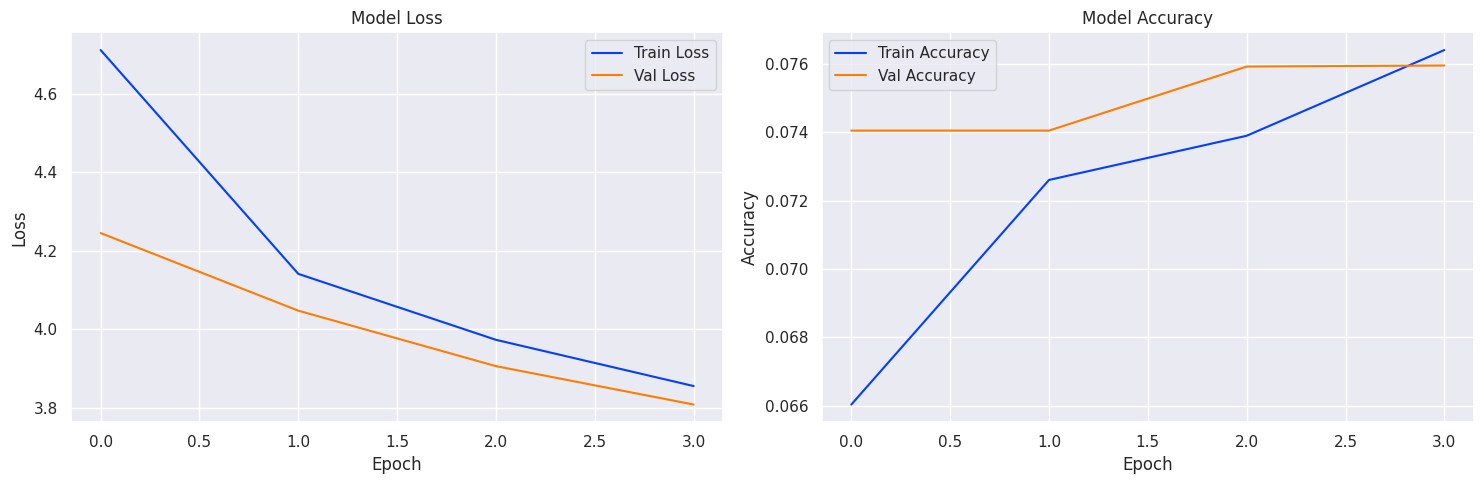

{'train_loss': [np.float64(4.711613744520328),
  np.float64(4.140956356583585),
  np.float64(3.972764203506059),
  np.float64(3.8549149890966614)],
 'train_acc': [np.float64(0.06603281267208563),
  np.float64(0.07260141847876211),
  np.float64(0.07389350369768383),
  np.float64(0.07640040291403155)],
 'val_loss': [np.float64(4.245012514954372),
  np.float64(4.047118963389996),
  np.float64(3.905655089198359),
  np.float64(3.807825585627398)],
 'val_acc': [np.float64(0.07404474555607268),
  np.float64(0.07404474555607268),
  np.float64(0.07591767601964884),
  np.float64(0.07594871906600646)]}

In [54]:
train_loader, val_loader, test_loader, encode, decode, n_classes = prepare_classification_data(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    batch_size=32
)

# Number of fatures and classes
in_features = X_train.shape[1]
num_class = n_classes

model = NoodleFluxNet(in_features, num_class, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 4

train(model, optimizer, criterion, train_loader, val_loader, epochs, device, is_classification=True)

Функция подсчёта RMSE с декодированием прогноза.

In [55]:
@torch.no_grad()
def compute_rmse_classification(model, data_loader, y_true, decode, device='cpu'):
    model.eval()

    preds_classes = predict(model, data_loader, device, is_classification=True)
    preds_years = decode(preds_classes.numpy())
    y_true = np.array(y_true)

    rmse = root_mean_squared_error(y_true, preds_years)
    return rmse

rmse = compute_rmse_classification(model, test_loader, y_test, decode, device)
print(f"\nRMSE for classification model: {rmse:.4f}")

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for classification model: 13.8035


$RMSE$ для нейросети с классификацией равен 13.8035

**Задание 3 (1 балл).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Данная нейросеть получилась хуже бейзлайна. Но не такой уж и ужасной.
Это может быть связано с тем, что наши данные не отмасштабированы.

Также целевая переменная (года) имеют значения в тысячах, что может сильно влиять на градиент, взрывать его. Это мы решаем тем, что переводим года в классы.

Минусы классификации: приходится делать дополнительные манипуляции (кодирование, декодирование) после предсказания класса для перевода в год, при подсчёте RMSE. CrossEntropyLoss не учитывает расстояние между классами. например, ошибка для истинного года 1990 равна как для 1991, так и для 2000.

**Вывод:**
1. Побить бейзлайн не удалось
2. Кажется, логичнее использовать регрессию

**Задание 4 (2 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [14]:
def prepare_regression_data(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32):
    # Create DataSets
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_train), dtype=torch.float32),
        torch.tensor(np.array(y_train).reshape(-1, 1), dtype=torch.float32)
    )

    val_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_val), dtype=torch.float32),
        torch.tensor(np.array(y_val).reshape(-1, 1), dtype=torch.float32)
    )

    test_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_test), dtype=torch.float32),
        torch.tensor(np.array(y_test).reshape(-1, 1), dtype=torch.float32)
    )

    # Create DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


train_loader, val_loader, test_loader = prepare_regression_data(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    batch_size=32
)

Функция подсчёта RMSE.

In [15]:
@torch.no_grad()
def compute_rmse(model, data_loader, y_true, device='cpu'):
    model.eval()

    preds = predict(model, data_loader, device)
    y_true = np.array(y_true)

    rmse = root_mean_squared_error(y_true, preds)
    return rmse

In [16]:
in_features = X_train.shape[1]
out_features = 1

Epoch 1/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: nan
Val Loss: nan

Epoch 2/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: nan
Val Loss: nan

Epoch 3/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: nan
Val Loss: nan

Epoch 4/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: nan
Val Loss: nan



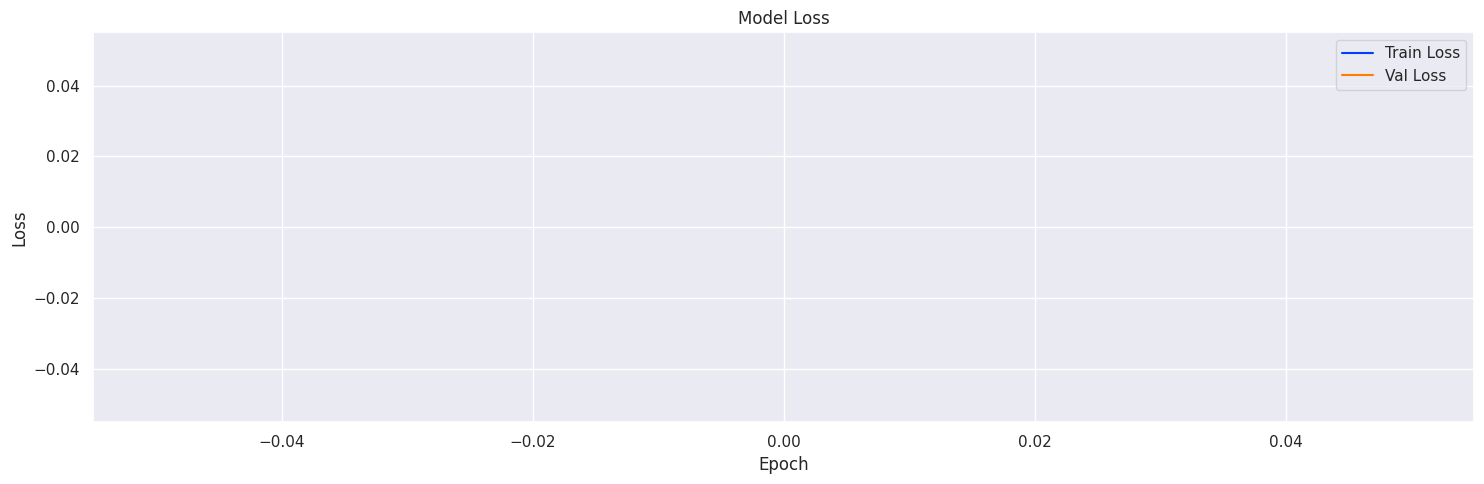

{'train_loss': [np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan)],
 'train_acc': [0.0, 0.0, 0.0, 0.0],
 'val_loss': [np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan)],
 'val_acc': [0.0, 0.0, 0.0, 0.0]}

In [58]:
model = NoodleFluxNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 4

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

# rmse = compute_rmse(model, test_loader, y_test, device)
# print(f"\nRMSE for regression model: {rmse:.4f}")

Уменьшим шаг обучения.

Epoch 1/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 881495.9830
Val Loss: 685176.9200

Epoch 2/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 623379.6730
Val Loss: 570819.0244

Epoch 3/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 535913.2436
Val Loss: 506745.8904

Epoch 4/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 487354.0789
Val Loss: 471717.8123



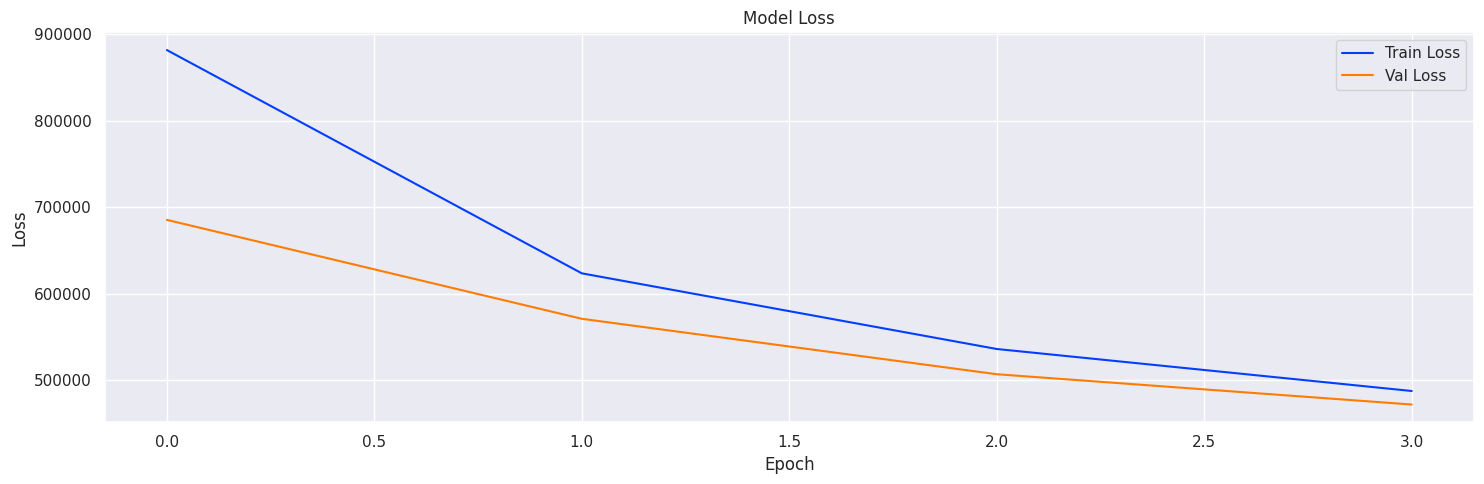

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for regression model: 687.8799


In [59]:
model = NoodleFluxNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-10)
criterion = nn.MSELoss()
epochs = 4

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE for regression model: {rmse:.4f}")

$RMSE$ для простой нейросети с 1 скрытым слоем равен 687.8799

Посмотрим на распределение целевой переменной.

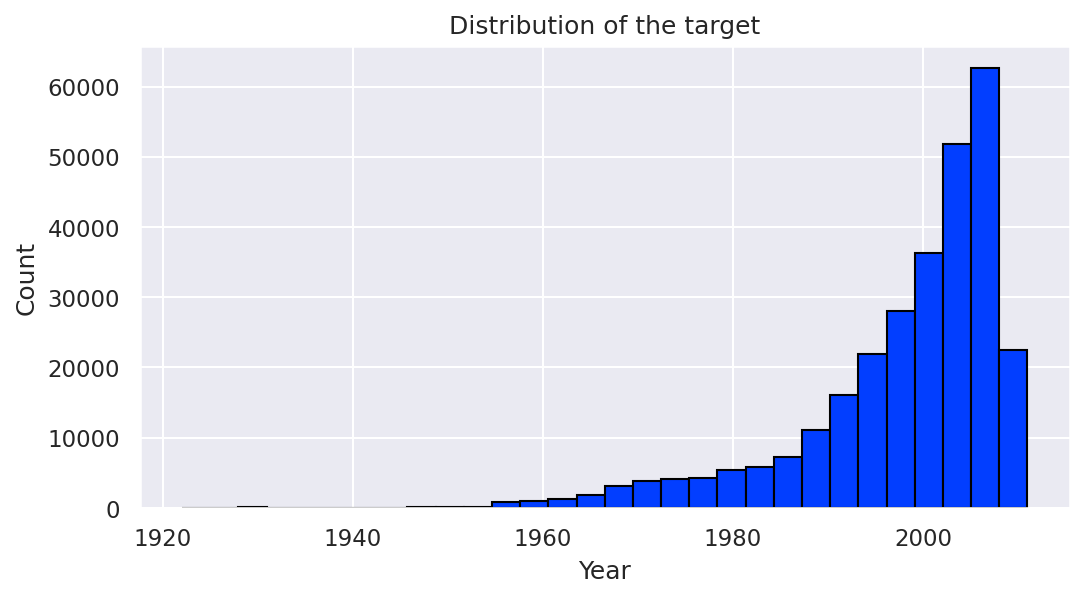

In [60]:
plt.figure(figsize=(8, 4), dpi=150)
plt.hist(y_train, bins=30, edgecolor='black')
plt.title("Distribution of the target")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Посмотрим на магнитуду признаков. Простите, график не очень красивый получился.

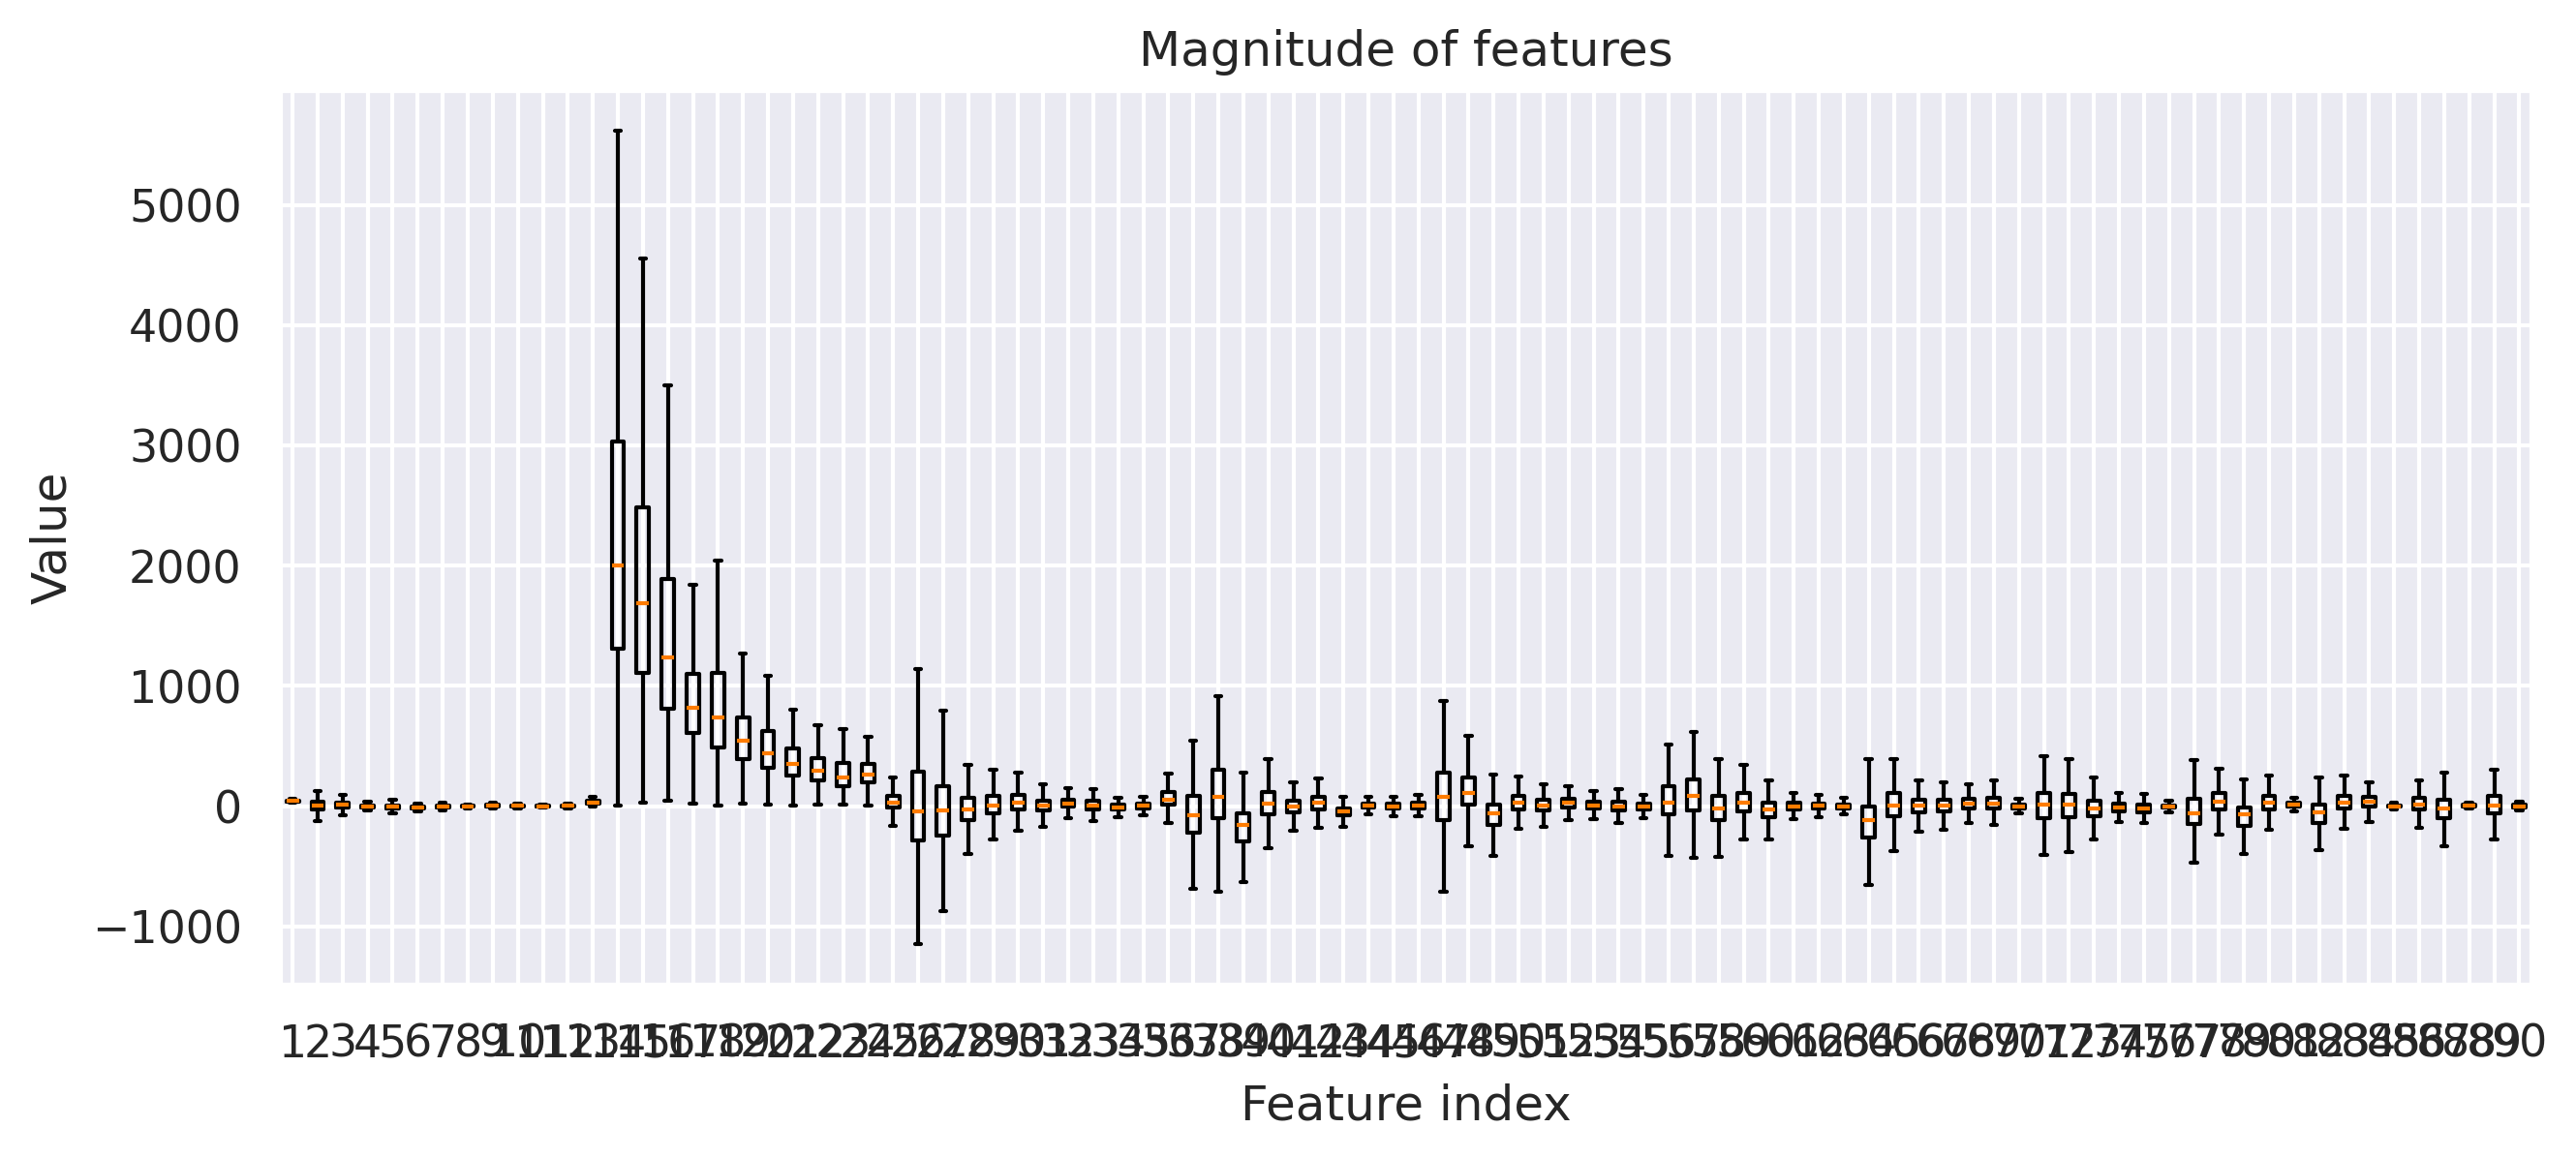

In [61]:
plt.figure(figsize=(10, 4), dpi=300)
plt.boxplot(X_train, showfliers=False)
plt.title("Magnitude of features")
plt.xlabel("Feature index")
plt.ylabel("Value")
plt.show()

**Задание 5 (1 балл).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Сначала попробовал запустить с шагом обучения `lr = 1e-3`, но он оказался слишком большим — функция потерь не считалась.

После этого уменьшил шаг до `lr = 1e-10`. Это сильно улучшило положение, функция потерь посчиталась, а $RMSE$ стал равен $689$.

Но при этом классификация имела $RMSE = 13$, что значительно лучше, чем в регрессии. Мне кажется, это связано с тем, что в классификации ищется класс, который имеет значения более близкие к $0$, чем в регрессии, то есть градиенты должны оказаться поменьше.

Если посмотреть на распределение целевой переменной, то оно неравномерное.\
В выборке наблюдается перекос — песен с большими годами (новых) больше, чем с маленькими. Такая несбалансированность может приводить к смещённым оценкам и неустойчивому обучению.

Посмотрим на магнитуду признаков. Признаки не отмасштабированы, они находятся в разных диапазонах: одни колеблятся около нуля, другие - в промежутке от -1000 до 1000, а третьи вообще расположены у 2000.

**Задание 6 (1 балл).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [17]:
y_train_min = None
y_train_max = None

def fit_normalizer(y_train):
    """
    Estimate min and max for sample
    """
    global y_train_min, y_train_max
    y_arr = np.array(y_train).reshape(-1)
    y_train_min = float(y_arr.min())
    y_train_max = float(y_arr.max())
    if y_train_min == y_train_max:
        y_train_max = y_train_min + 1.0

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    global y_train_min, y_train_max
    y_arr = np.array(sample).astype(float)
    return (y_arr - y_train_min) / (y_train_max - y_train_min)


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    global y_train_min, y_train_max
    y_arr = np.array(sample).astype(float)
    return y_arr * (y_train_max - y_train_min) + y_train_min

**Задание 7 (1 балл)** Теперь повторите эксперимент из **задания 4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

In [18]:
class NoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, out_features)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.relu(out)
        out = self.f2(out)
        out = self.sigmoid(out)
        return out

In [19]:
def prepare_target_norm_data(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32):
    fit_normalizer(y_train)

    # Create DataSets
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_train), dtype=torch.float32),
        torch.tensor(normalize(y_train).reshape(-1, 1), dtype=torch.float32)
    )

    val_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_val), dtype=torch.float32),
        torch.tensor(normalize(y_val).reshape(-1, 1), dtype=torch.float32)
    )

    test_dataset = torch.utils.data.TensorDataset(
        torch.tensor(np.array(X_test), dtype=torch.float32),
        torch.tensor(normalize(y_test).reshape(-1, 1), dtype=torch.float32)
    )

    # Create DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


train_loader, val_loader, test_loader = prepare_target_norm_data(
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    batch_size=32
)

Epoch 1/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0362
Val Loss: 0.0354

Epoch 2/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0353
Val Loss: 0.0354

Epoch 3/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0353
Val Loss: 0.0354

Epoch 4/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0353
Val Loss: 0.0354



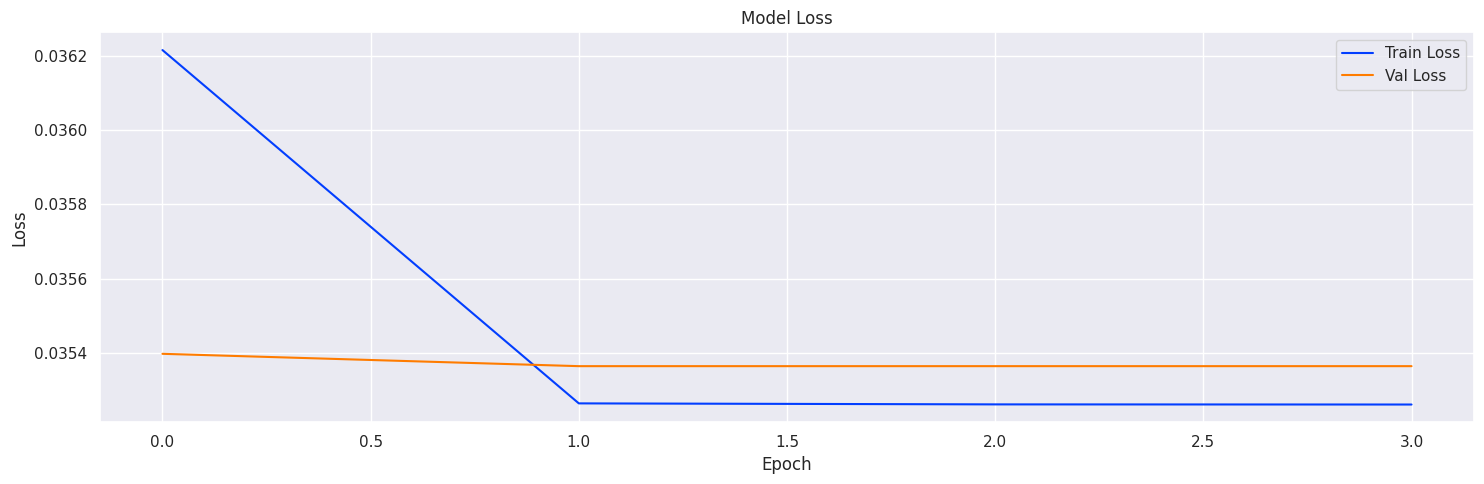

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE: 16.5775


In [20]:
in_features = X_train.shape[1]
out_features = 1

model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 4

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

@torch.no_grad()
def compute_rmse(model, data_loader, y_true, device='cpu'):
    model.eval()

    preds = predict(model, data_loader, device)
    preds_denorm = denormalize(preds)
    y_true = np.array(y_true)

    rmse = root_mean_squared_error(y_true, preds_denorm)
    return rmse

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE: {rmse:.4f}")

$RMSE$ для нейросети с отмасштабированным таргетом равен 16.5775

**Задание 8 (2 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

train_loader, val_loader, test_loader = prepare_target_norm_data(
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    X_test_scaled, y_test,
    batch_size=32
)

Epoch 1/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0292
Val Loss: 0.0164

Epoch 2/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0154
Val Loss: 0.0151

Epoch 3/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0146
Val Loss: 0.0145

Epoch 4/4
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0141
Val Loss: 0.0141



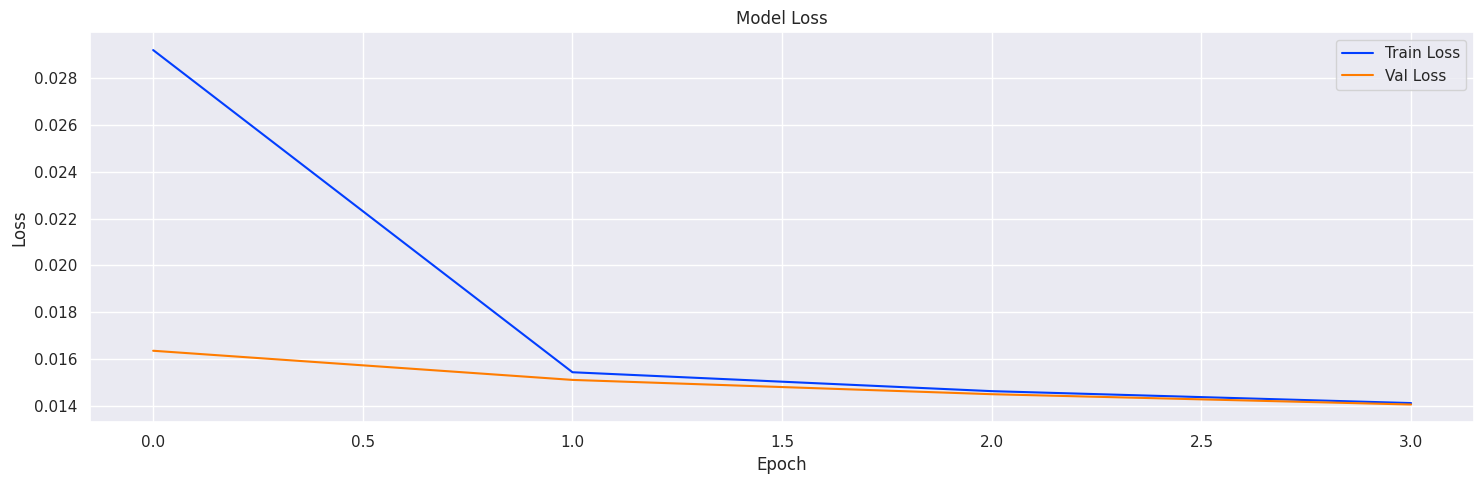

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for a scaled model with 4 epochs: 10.3540


In [67]:
model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 4

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE for a scaled model with 4 epochs: {rmse:.4f}")

$RMSE$ для нейросети с отмасштабированными признаками равен 10.354

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0270
Val Loss: 0.0160

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0152
Val Loss: 0.0150

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0146
Val Loss: 0.0146

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0142
Val Loss: 0.0142

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0139
Val Loss: 0.0140

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0137
Val Loss: 0.0138

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0135
Val Loss: 0.0136

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0134
Val Loss: 0.0135

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0132
Val Loss: 0.0133

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0131
Val Loss: 0.0132



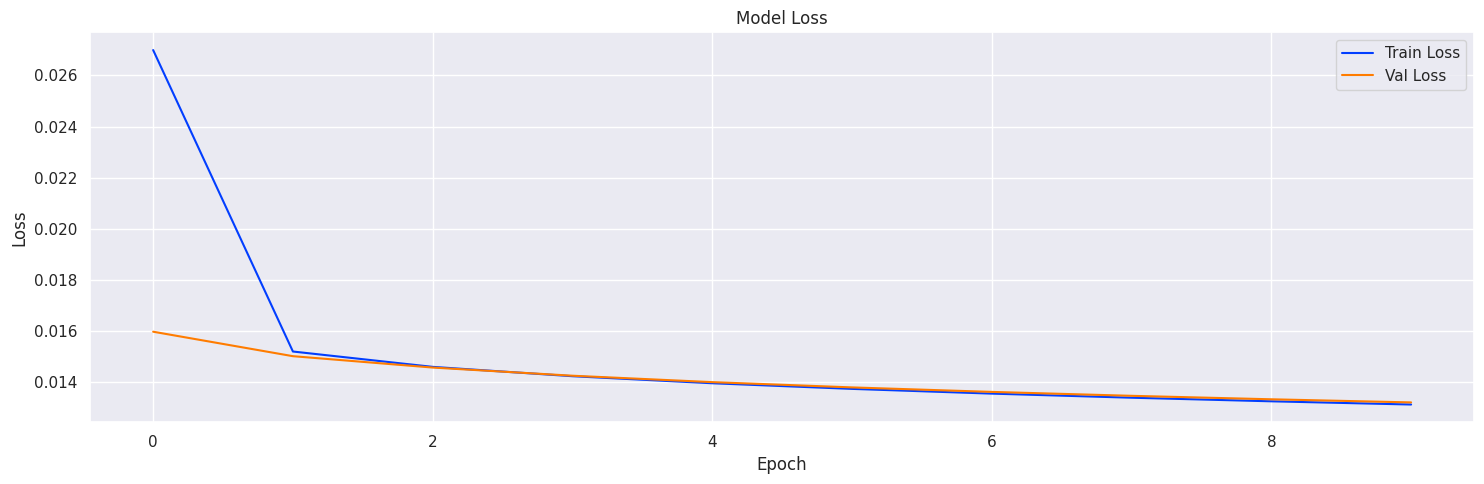

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for a scaled model with 10 epochs: 10.0556


In [68]:
model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE for a scaled model with 10 epochs: {rmse:.4f}")

$RMSE$ для нейросети с отмасштабированными признаками с большим количеством эпох равен 10.0556

Урааа! Реально получилось сравнимо с `Ridge`!

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть III. Улучшаем нейронную сеть (максимум 10 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 9 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0155
Val Loss: 0.0130

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0124
Val Loss: 0.0121

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0118
Val Loss: 0.0117

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0115
Val Loss: 0.0115

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0113
Val Loss: 0.0113

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0111
Val Loss: 0.0112

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0110
Val Loss: 0.0110

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0109
Val Loss: 0.0110

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0108
Val Loss: 0.0109

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0107
Val Loss: 0.0108



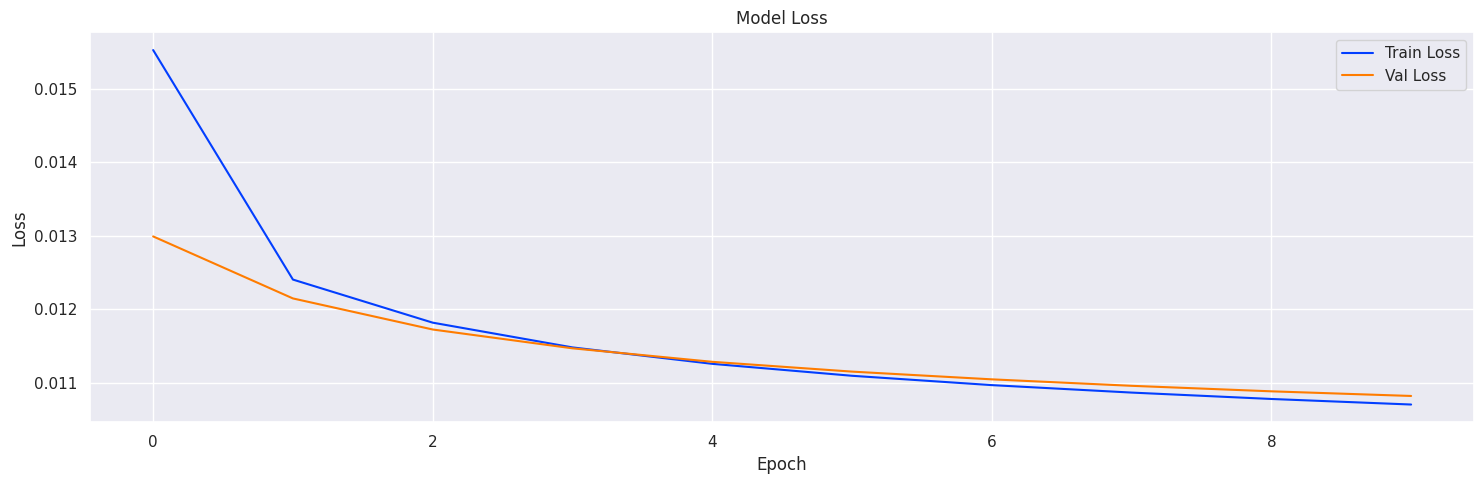

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for SGD + momentum: 9.1431


In [69]:
model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
criterion = nn.MSELoss()
epochs = 10

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE for SGD + momentum: {rmse:.4f}")

$RMSE$ для SGD + momentum равен 9.1431

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0108
Val Loss: 0.0103

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0101

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0100

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0100

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0099

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0099

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0098

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0099

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0098

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0098



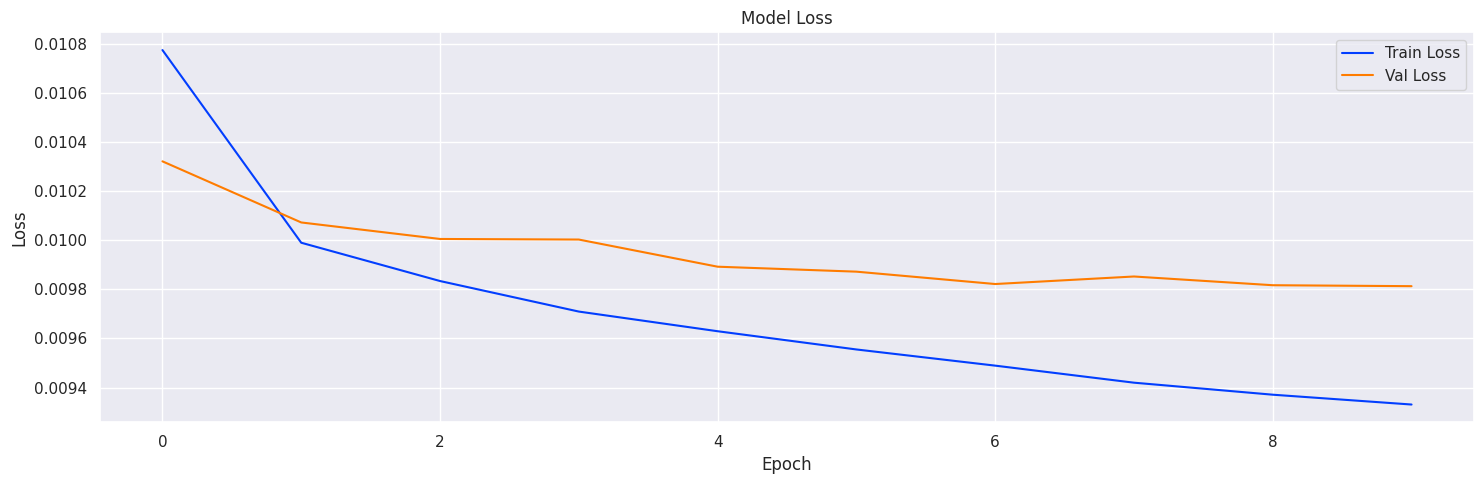

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for Adam: 8.8141


In [70]:
model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(model, test_loader, y_test, device)
print(f"\nRMSE for Adam: {rmse:.4f}")

$RMSE$ для Adam равен 8.8141

**Вывод:** Добавление momentum к SGD улучшило результат почти на 1 год в $RMSE$! Momentum позволяет не застревать в локальных минимумах. Adam показал результаты ещё лучше, и теперь моя нейросеть показывает результаты лучше, чем обычный Ridge. Adam ещё и адаптирует шаг обучения, это позволяет лучше "иди по лагдшафту функции ошибки". Поэтому в последующих экпериментах лучше использовать Adam.

**Задание 10 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0107
Val Loss: 0.0104

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0101

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0101

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0099

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0100

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0099

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0098

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0101

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0098

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0092
Val Loss: 0.0099



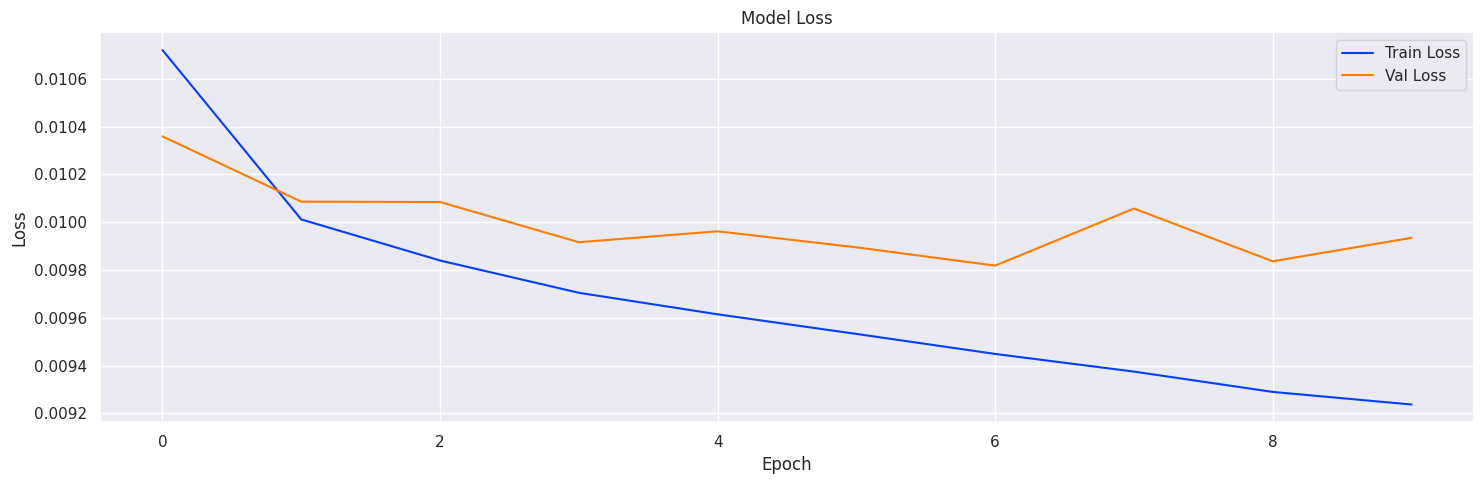

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for wide model: 8.8586


In [71]:
wide_model = NoodleFluxSigmoidNet(in_features, out_features, hidden_size=256).to(device)
optimizer = optim.Adam(wide_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(wide_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(wide_model, test_loader, y_test, device)
print(f"\nRMSE for wide model: {rmse:.4f}")

$RMSE$ для нейросети с более широким скрытым слоем равен 8.8586

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0105
Val Loss: 0.0100

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0099

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0097

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0097

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0096

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0091
Val Loss: 0.0096

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0090
Val Loss: 0.0097

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0089
Val Loss: 0.0097

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0088
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0087
Val Loss: 0.0096



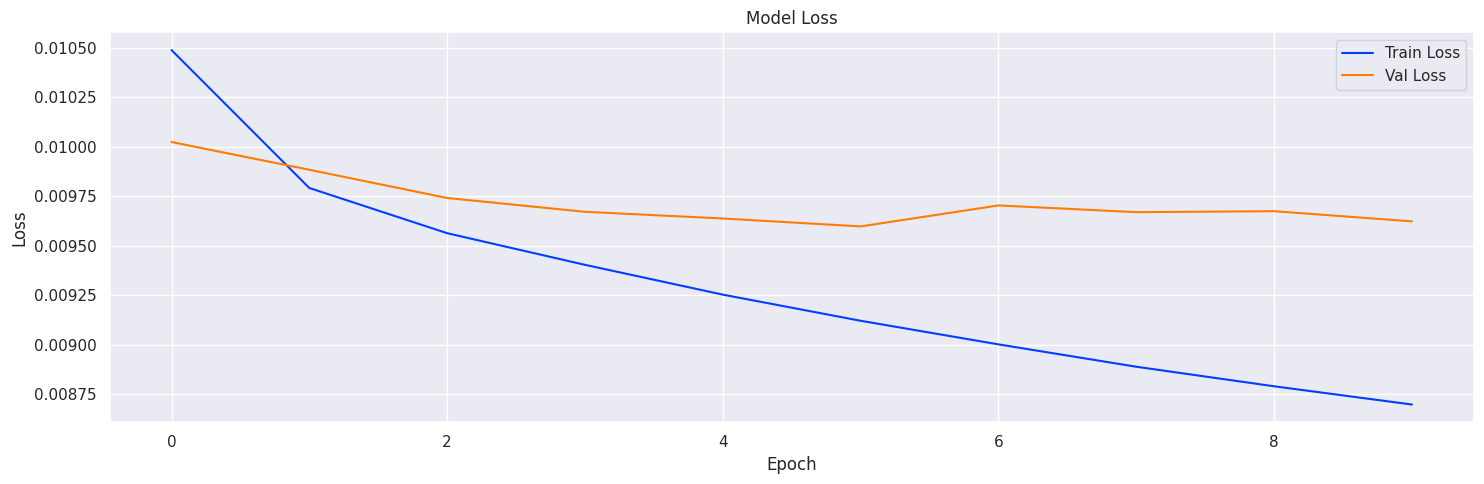

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for deep model: 8.8157


In [72]:
class DeepNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, out_features)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.relu(out)
        out = self.f2(out)
        out = self.relu(out)
        out = self.f3(out)
        out = self.sigmoid(out)
        return out

deep_model = DeepNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(deep_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(deep_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(deep_model, test_loader, y_test, device)
print(f"\nRMSE for deep model: {rmse:.4f}")

$RMSE$ для нейросети с 2 скрытыми слоями равен 8.8157

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0105
Val Loss: 0.0100

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0098

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0097

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0097

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0092
Val Loss: 0.0098

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0090
Val Loss: 0.0097

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0088
Val Loss: 0.0097

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0087
Val Loss: 0.0096

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0085
Val Loss: 0.0096

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0084
Val Loss: 0.0097



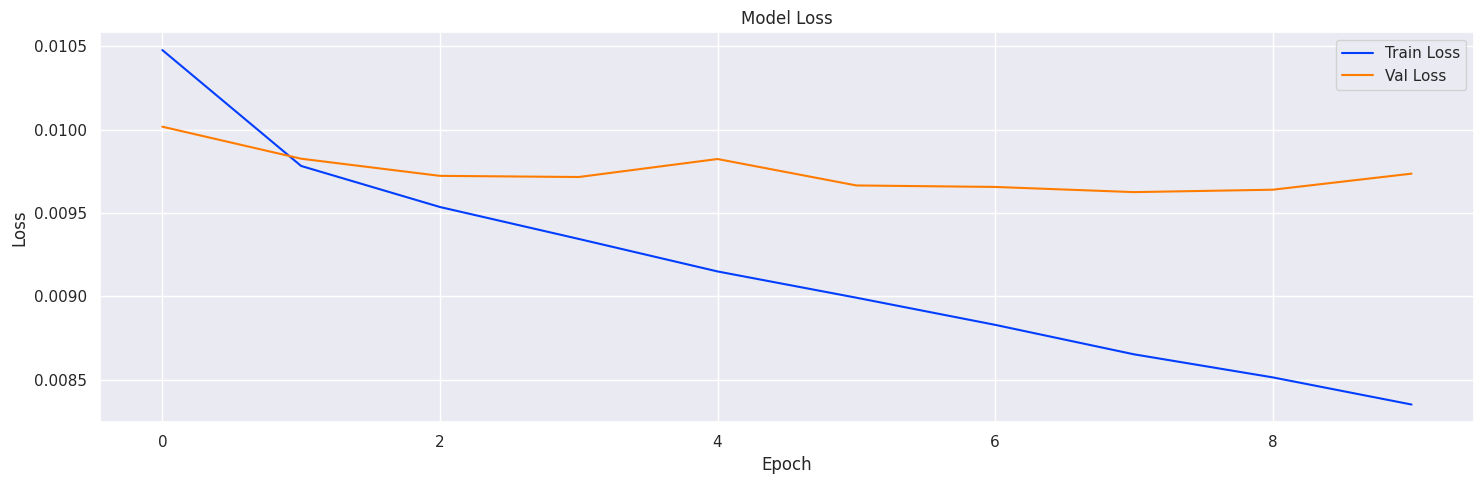

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for deep wide model: 8.9070


In [73]:
wide_deep_model = DeepNoodleFluxSigmoidNet(in_features, out_features, hidden_size=256).to(device)
optimizer = optim.Adam(wide_deep_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(wide_deep_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(wide_deep_model, test_loader, y_test, device)
print(f"\nRMSE for deep wide model: {rmse:.4f}")

$RMSE$ для глубокой и широкой нейросети равен 8.9070

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

**Вывод:**
1. Увеличение размерности скрытого слоя привело к заметному переобучению: качество на обучающей выборке выросло, но метрики на валидации начали ухудшаться уже после нескольких эпох. При этом итоговое качество прогноза практически не улучшилось, и даже снизилось. Это указывает на то, что избыточное число параметров не даёт прироста обобщающей способности модели.

2. Добавление второго скрытого слоя незначительно улучшило результаты: модель обучалась быстрее и достигала меньшей ошибки на валидации на ранних эпохах. Но валидационные кривые стали менее стабильными, линии графиков стали более ломаными.

3. Увеличение глубины и ширины сети привело к ухудшению качества на валидации, несмотря на визуально более плавное поведение функции потерь. Скорее всего, это связано с усложнением оптимизационной задачи и трудностью регуляризации модели при большом числе параметров.

Итог: Лучшим вариантом кажется глубокая, но не слишком широкая сеть, которая сохраняет достаточную хорошую способность без чрезмерного роста числа параметров. Такой баланс обеспечивает лучшее соотношение между скоростью сходимости и обобщающей способностью модели.

**Задание 11 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0112
Val Loss: 0.0102

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0101

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0100

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0099

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0098

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0098

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0097

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0098

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0097



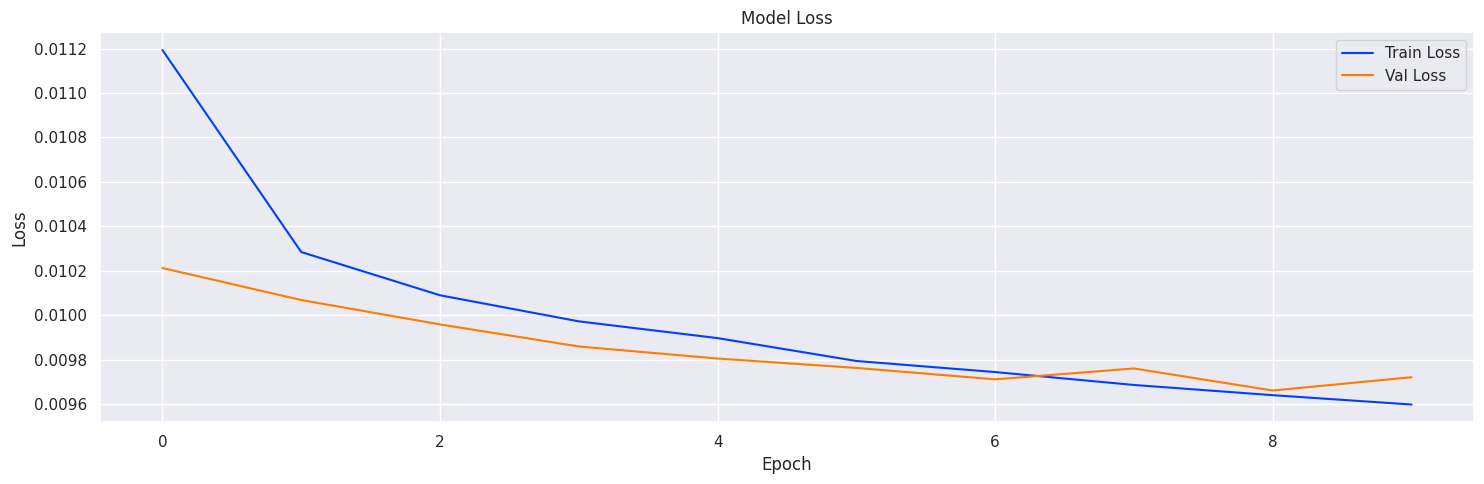

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for model with dropout: 8.7297


In [74]:
class DropoutNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, out_features)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f3(out)
        out = self.sigmoid(out)
        return out

dropout_model = DropoutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(dropout_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(dropout_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(dropout_model, test_loader, y_test, device)
print(f"\nRMSE for model with dropout: {rmse:.4f}")

$RMSE$ для нейросети с dropout равен 8.7297

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0111
Val Loss: 0.0101

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0099

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0097

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0097

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0096

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0096

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0096

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0096

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0095

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0092
Val Loss: 0.0096



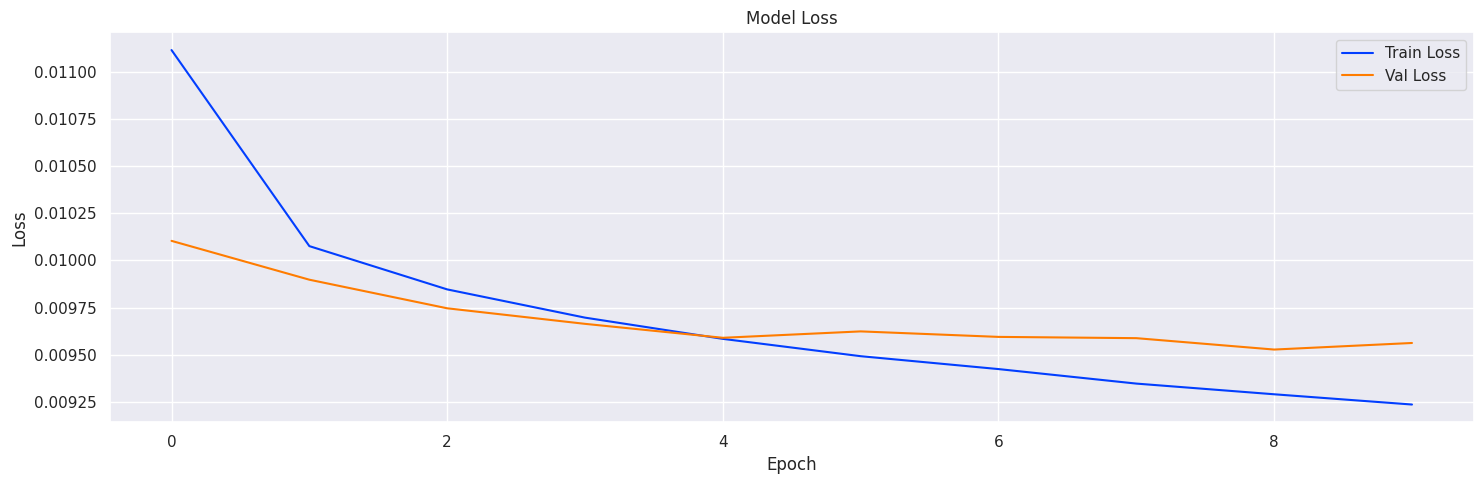

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for model with BatchNorm: 8.7011


In [75]:
class BathcNormNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, out_features)

        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.f2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.f3(out)
        out = self.sigmoid(out)
        return out

bn_model = BathcNormNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(bn_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(bn_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(bn_model, test_loader, y_test, device)
print(f"\nRMSE for model with BatchNorm: {rmse:.4f}")

$RMSE$ для нейросети с BatchNorm равен 8.7011

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0116
Val Loss: 0.0102

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0099

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0099

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0099

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0098

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097



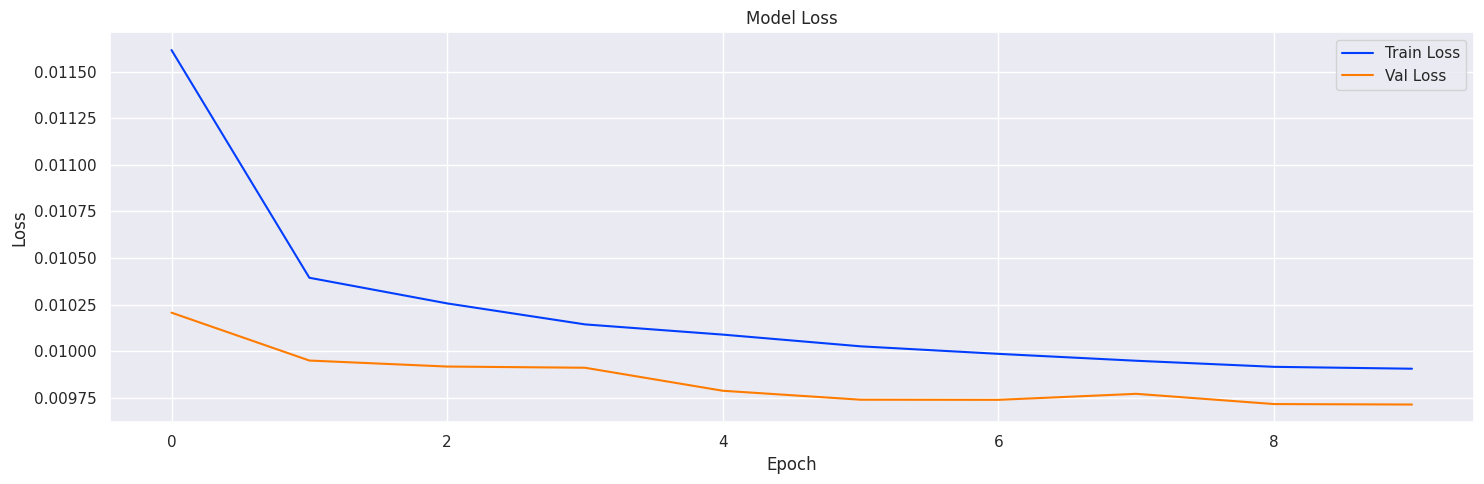

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for model with BatchNorm and dropout: 8.6987


In [22]:
class RevolutNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, out_features)

        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f3(out)
        out = self.sigmoid(out)
        return out

revolut_model = RevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(revolut_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
epochs = 10

train(revolut_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(revolut_model, test_loader, y_test, device)
print(f"\nRMSE for model with BatchNorm and dropout: {rmse:.4f}")

$RMSE$ для нейросети с dropout и BatchNorm равен 8.6987

Опишите результаты экспериментов.

**Вывод:**
1. Применение Dropout заметно снизило переобучение модели. Регуляризация улучшила обобщающую способность сети, за счёт чего метрики на валидационной выборке и на тесте стали выше по сравнению с моделью без Dropout.

2. Использование Batch Normalization также уменьшило переобучение, но эффект оказался менее выраженным. Тем не менее, нормализация ускорила сходимость и способствовала снижению ошибки на обеих выборках, что говорит о стабилизации процесса обучения. Значение $RMSE$ на тесте оказалось одним из лучших.

3. Совместное применение Dropout и Batch Normalization дало наилучший результат: переобучение исчезло, а качество предсказаний на валидации достигло одного из лучших результата среди всех протестированных вариантов. Комбинация этих методов позволила добиться баланса между устойчивостью обучения и точностью модели.

**Задание 12 (1 балл).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению RMSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения). Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости RMSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.


--- Testing LR: 0.0001 ---
Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0204
Val Loss: 0.0108

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0112
Val Loss: 0.0103

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0108
Val Loss: 0.0103

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0106
Val Loss: 0.0101

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0100

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0100

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0099

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0100

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098



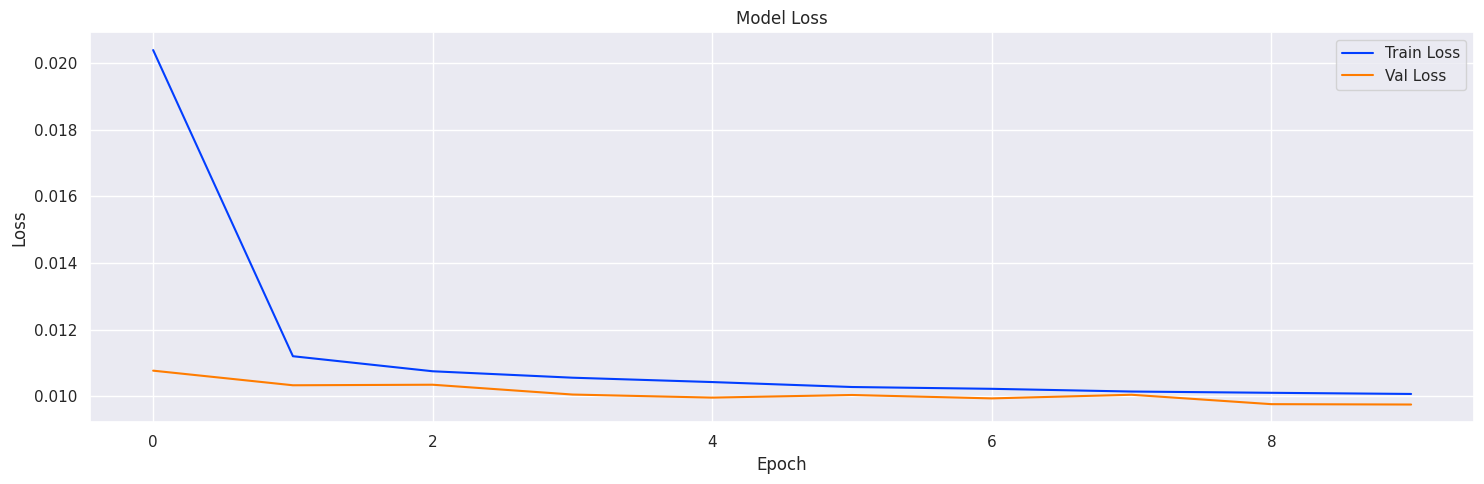

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.8445
Final Val RMSE: 8.7900

--- Testing LR: 0.0005 ---
Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0121
Val Loss: 0.0102

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0105
Val Loss: 0.0100

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0099

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0099

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0099

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097



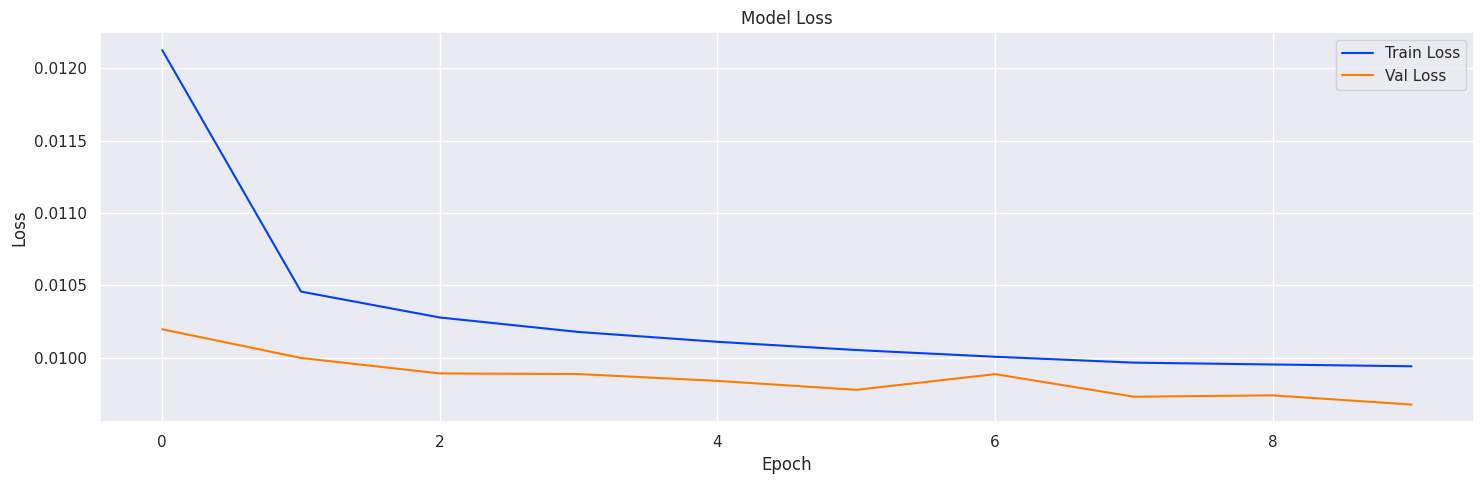

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.8677
Final Val RMSE: 8.7546

--- Testing LR: 0.001 ---
Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0115
Val Loss: 0.0102

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0100

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0099

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0098

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0098

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0098

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097



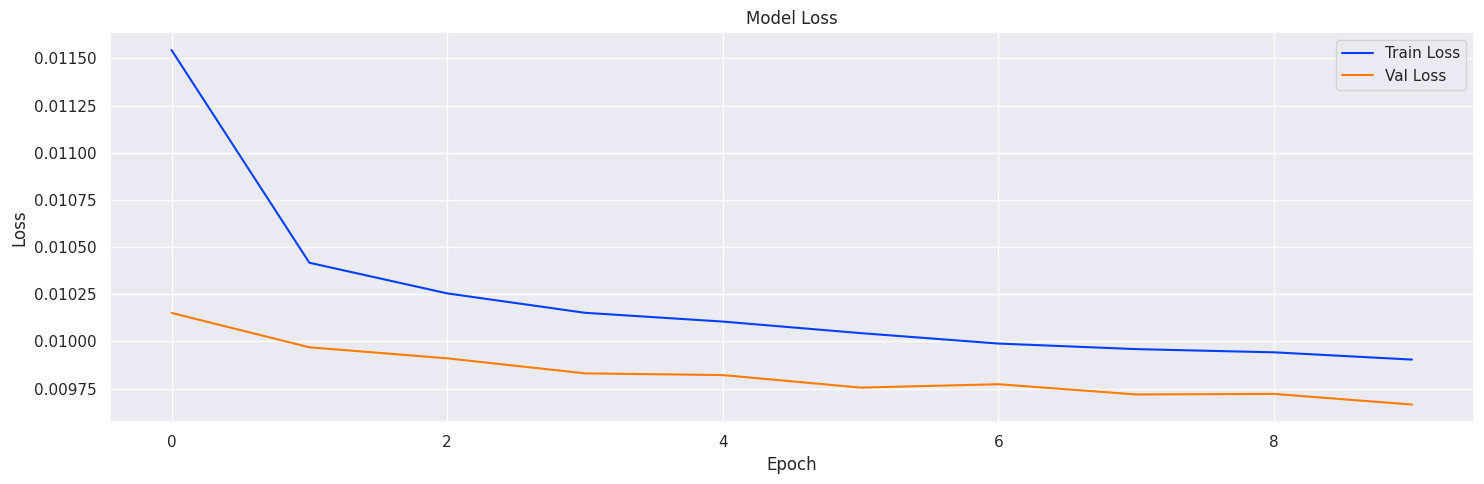

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.7679
Final Val RMSE: 8.7502

Best LR found: 0.001


In [23]:
lr_candidates = [1e-4, 5e-4, 1e-3]
criterion = nn.MSELoss()
epochs = 10

lr_tuning_results = {
    'lr': [],
    'train_rmse': [],
    'val_rmse': []
}

for lr in lr_candidates:
    print(f"\n--- Testing LR: {lr} ---")

    # Initialization
    model = RevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train
    train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

    # Computing RMSE
    train_rmse = compute_rmse(model, train_loader, y_train, device)
    val_rmse = compute_rmse(model, val_loader, y_val, device)

    print(f"Final Train RMSE: {train_rmse:.4f}")
    print(f"Final Val RMSE: {val_rmse:.4f}")

    lr_tuning_results['lr'].append(lr)
    lr_tuning_results['train_rmse'].append(train_rmse)
    lr_tuning_results['val_rmse'].append(val_rmse)

best_lr_idx = np.argmin(lr_tuning_results['val_rmse'])
best_lr = lr_tuning_results['lr'][best_lr_idx]
print(f"\nBest LR found: {best_lr}")


--- Testing Weight Decay: 0.0 ---
Epoch 1/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0116
Val Loss: 0.0102

Epoch 2/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0100

Epoch 3/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0099

Epoch 4/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0098

Epoch 5/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0098



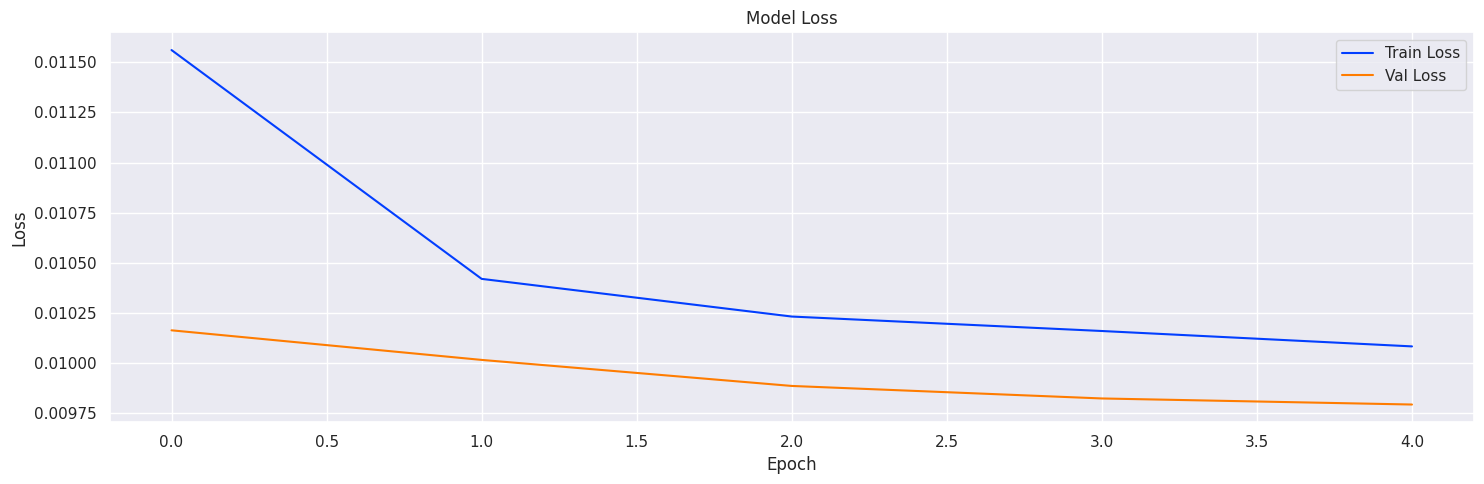

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.5909
Final Val RMSE: 8.8068

--- Testing Weight Decay: 1e-06 ---
Epoch 1/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0115
Val Loss: 0.0102

Epoch 2/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0100

Epoch 3/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0099

Epoch 4/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0099

Epoch 5/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0099



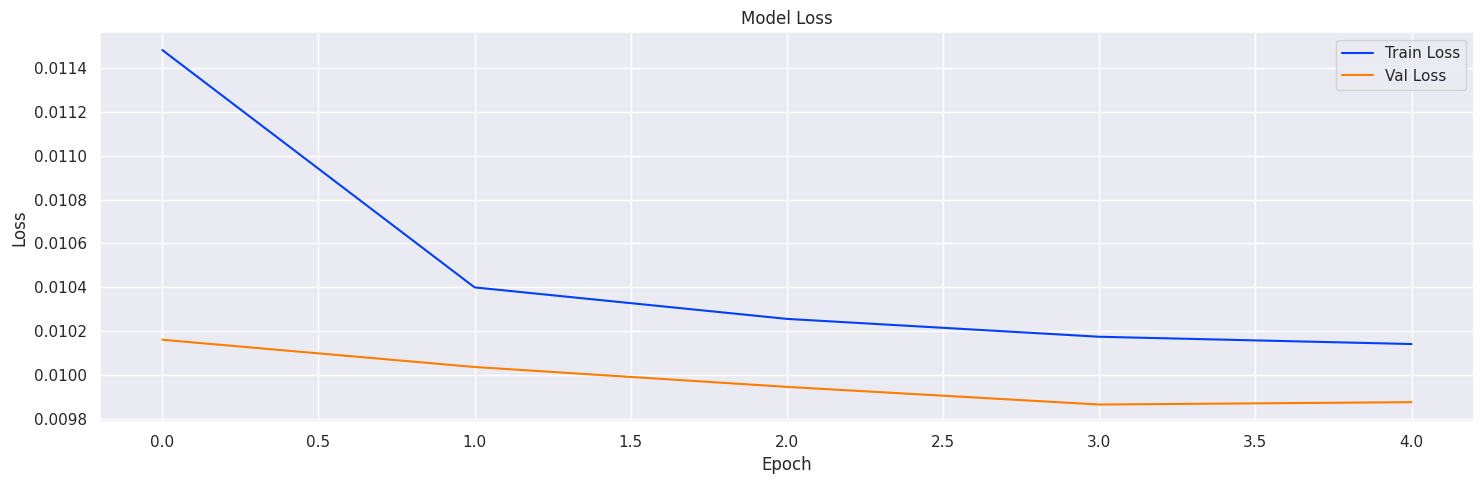

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.6593
Final Val RMSE: 8.8452

--- Testing Weight Decay: 1e-05 ---
Epoch 1/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0115
Val Loss: 0.0103

Epoch 2/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0105
Val Loss: 0.0101

Epoch 3/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0101

Epoch 4/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0102

Epoch 5/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0104
Val Loss: 0.0101



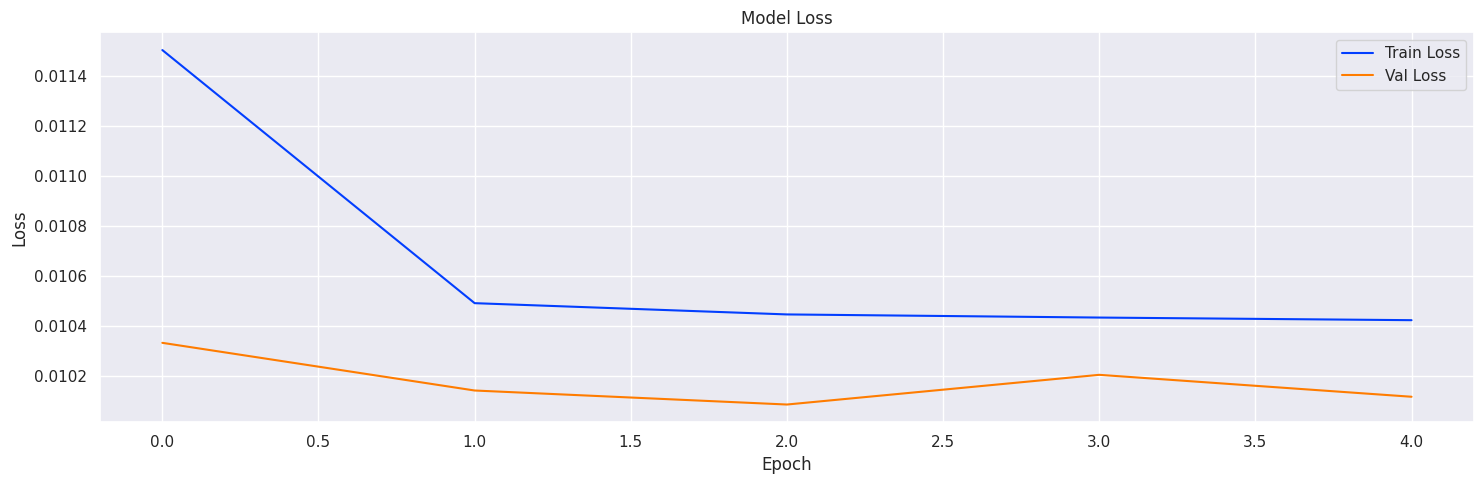

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 12.5006
Final Val RMSE: 8.9520

--- Testing Weight Decay: 0.001 ---
Epoch 1/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0118
Val Loss: 0.0109

Epoch 2/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0114
Val Loss: 0.0110

Epoch 3/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0114
Val Loss: 0.0112

Epoch 4/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0114
Val Loss: 0.0109

Epoch 5/5
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0114
Val Loss: 0.0111



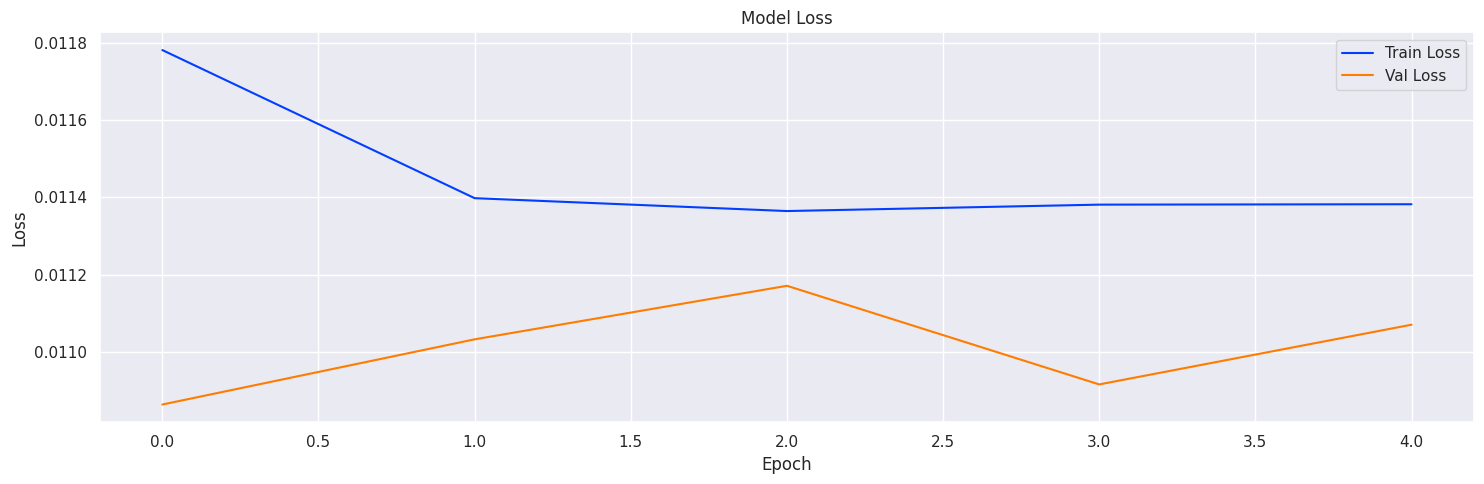

predicting:   0%|          | 0/9059 [00:00<?, ?it/s]

predicting:   0%|          | 0/3020 [00:00<?, ?it/s]

Final Train RMSE: 11.8747
Final Val RMSE: 9.3648

Best Weight Decay found: 0.0


In [24]:
wd_candidates = [0.0, 1e-6, 1e-5, 1e-3]

wd_tuning_results = {
    'wd': [],
    'train_rmse': [],
    'val_rmse': []
}

for wd in wd_candidates:
    print(f"\n--- Testing Weight Decay: {wd} ---")

    # Initialization
    model = RevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
    optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=wd)

    # Train
    epochs=5
    train(model, optimizer, criterion, train_loader, val_loader, epochs, device)

    # Computing RMSE
    train_rmse = compute_rmse(model, train_loader, y_train, device)
    val_rmse = compute_rmse(model, val_loader, y_val, device)

    print(f"Final Train RMSE: {train_rmse:.4f}")
    print(f"Final Val RMSE: {val_rmse:.4f}")

    wd_tuning_results['wd'].append(wd)
    wd_tuning_results['train_rmse'].append(train_rmse)
    wd_tuning_results['val_rmse'].append(val_rmse)

best_wd_idx = np.argmin(wd_tuning_results['val_rmse'])
best_wd = wd_tuning_results['wd'][best_wd_idx]
print(f"\nBest Weight Decay found: {best_wd}")

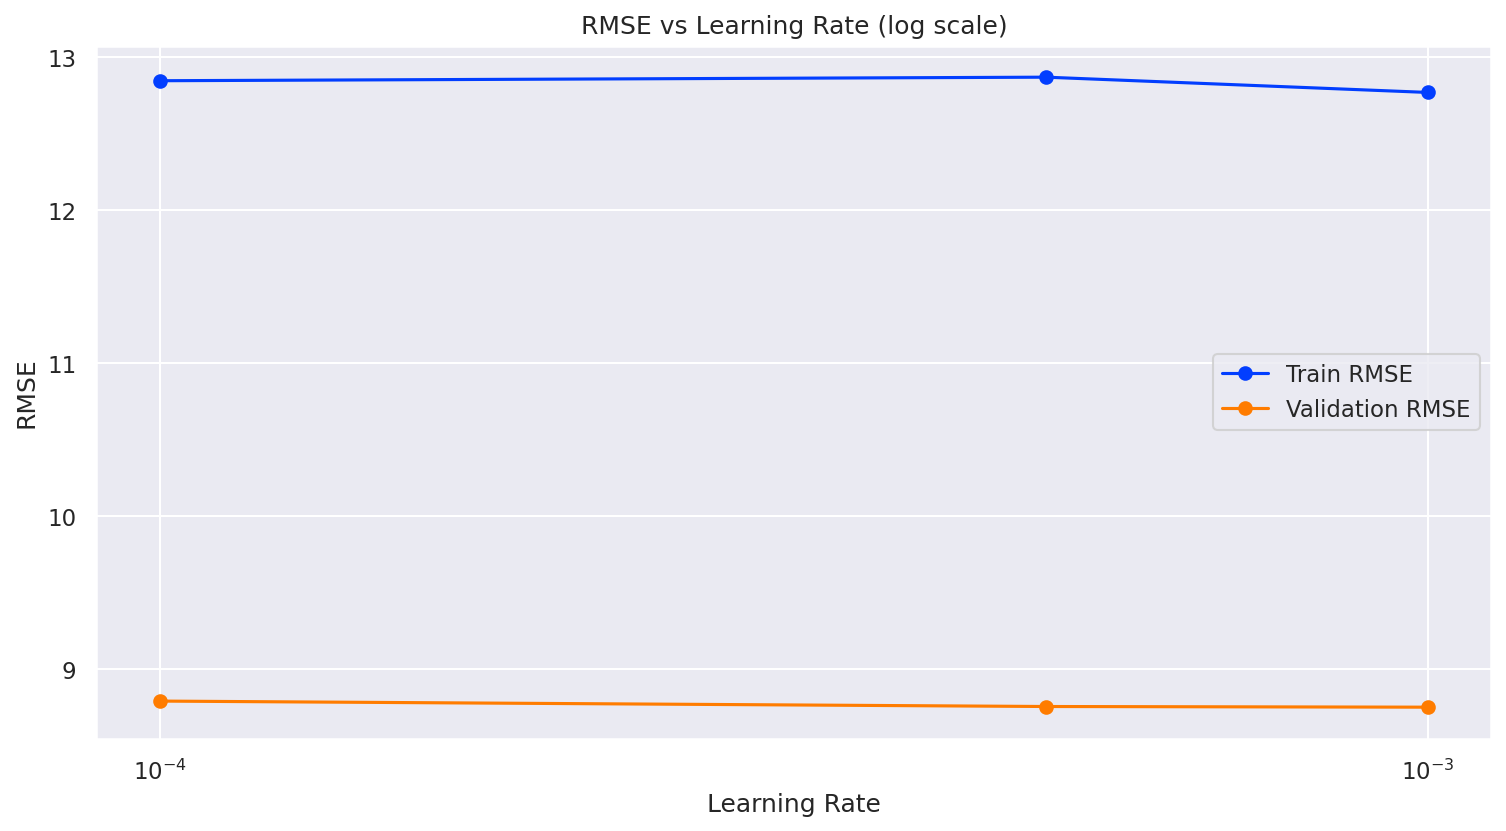

In [25]:
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(lr_tuning_results['lr'], lr_tuning_results['train_rmse'], marker='o', label='Train RMSE')
plt.plot(lr_tuning_results['lr'], lr_tuning_results['val_rmse'], marker='o', label='Validation RMSE')
plt.xscale('log')
plt.title('RMSE vs Learning Rate (log scale)')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

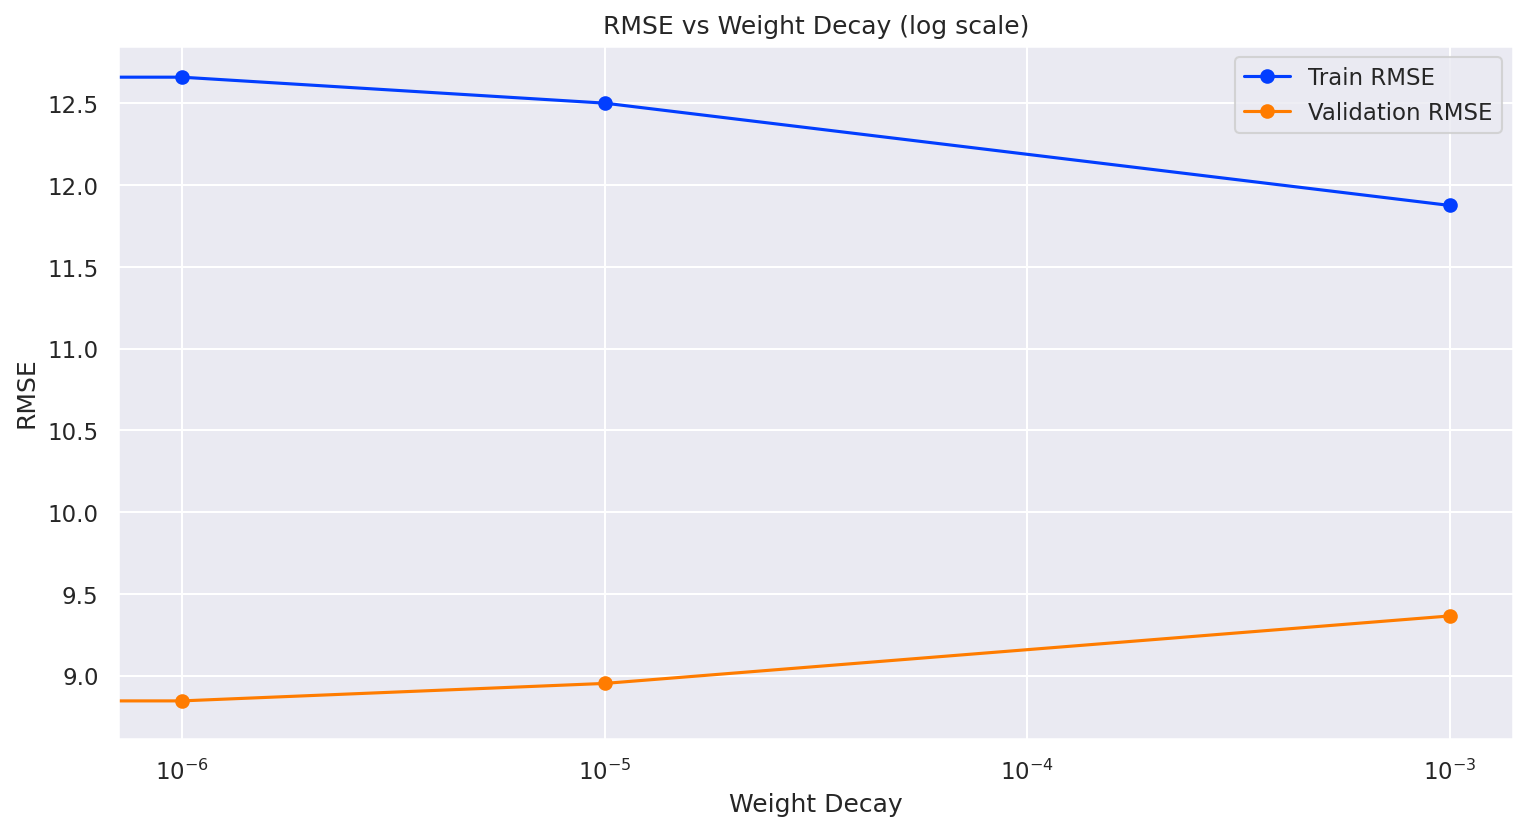

In [26]:
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(wd_tuning_results['wd'], wd_tuning_results['train_rmse'], marker='o', label='Train RMSE')
plt.plot(wd_tuning_results['wd'], wd_tuning_results['val_rmse'], marker='o', label='Validation RMSE')
plt.xscale('log')
plt.title('RMSE vs Weight Decay (log scale)')
plt.xlabel('Weight Decay')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

Как же ужасно ждать эти подборы геперпараметров...

Опишите результаты экспериментов.

**Вывод:**
При увеличении learning rate с $0.0001$ до $0.001$ наблюдается постепенное снижение ошибки на валидации, после чего метрика стабилизируется. Оптимальным значением можно считать `lr = 5e-4`, при котором достигается минимальный $RMSE$ на валидации $(8.75)$. Дальнейшее увеличение шага не давало улучшений.

При фиксированном `lr = 5e-4` добавление регуляризации weight decay показало, что небольшие значения не оказывают значимого влияния на качество, тогда как слишком сильная регуляризация `(1e-3)` приводит к росту ошибки на валидации $(RMSE = 9.36)$ и недообучению.

Наилучшее соотношение между скоростью сходимости и качеством достигается при `lr = 5e-4` и `weight_decay = 0`. С этими гиперпараметрами модель демонстрирует минимальный RMSE на валидации при стабильных значениях на обучении, что говорит о хорошем балансе между точностью и обобщающей способностью.

> Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.




**Задание 13 (6 баллов).**

Думаю направление размышлений вы поняли. Постарайтесь с помощью своих экспериментов выбить максимально возможное значение RMSE на тестовой выборке. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 8.90 $ &mdash; 2 балла
- $\text{RMSE} \le 8.80 $ &mdash; 4 балла
- $\text{RMSE} \le 8.75 $ &mdash; 6 баллов

**Различные трюки, которые можно попробовать:**

1. Попробуйте делать во время обучения раннюю остановку обучения и сохранять модель в тот момент, когда качество на валидации начало ухудшаься, то есть модель начала переобучаться
2. Попробуйте усложнить архитектуру нейросет
    - Больше/меньше нейронов
    - Больше/меньше слоёв
    - Другие функции активации (tanh, relu, leaky relu, elu etc)
    - Регуляризация (dropout, l1,l2)
3. Попробуйте другие оптимизаторы, а также смену скорости обучения по расписанию.

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... Попробовать несколько значений, как мы делали в заданиях выше, адекватно, но делать какой-то огромный перебор будет самоубийством.

Логгируйте свои эксперименты. За один прогон пробуйте одно изменение. Иначе будет непонятно какие именно изменения улучшили качество, а какие ухудшили.

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0127
Val Loss: 0.0102

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0105
Val Loss: 0.0099

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0103
Val Loss: 0.0098

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0098

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0097

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0101
Val Loss: 0.0097

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0096

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0097

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0099
Val Loss: 0.0096



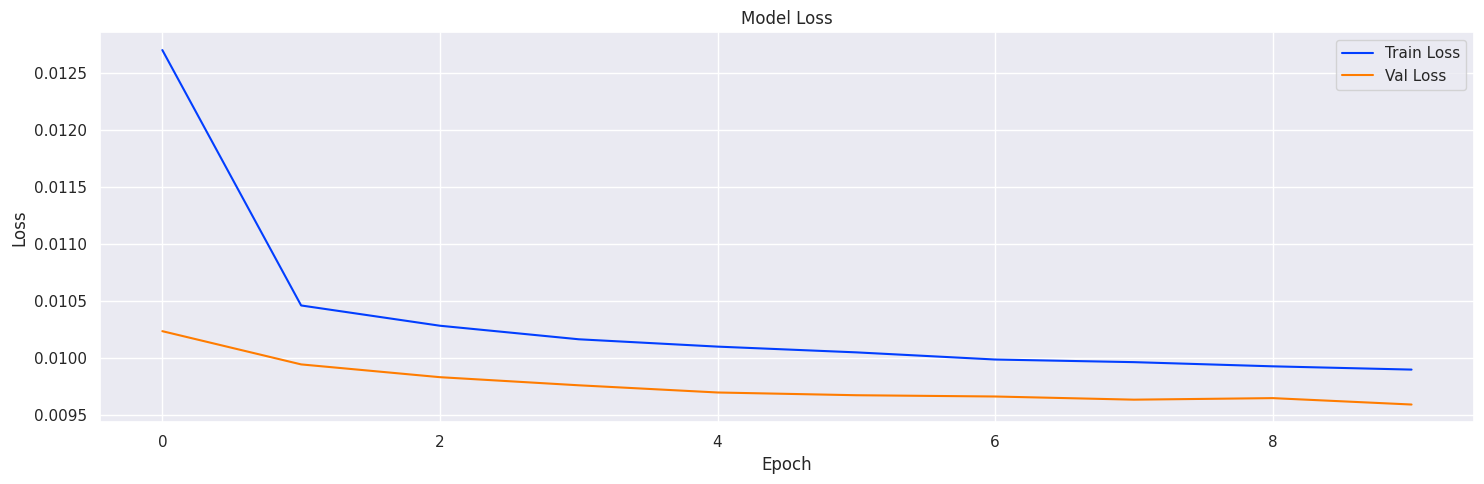

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for deeper network: 8.6596


In [27]:
class DeepRevolutNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=128):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.f4 = nn.Linear(hidden_size // 4, out_features)

        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.bn3 = nn.BatchNorm1d(hidden_size // 4)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f3(out)
        out = self.bn3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.f4(out)
        out = self.sigmoid(out)
        return out

deep_revolut_model = DeepRevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=128).to(device)
optimizer = optim.Adam(deep_revolut_model.parameters(), lr=best_lr, weight_decay=best_wd)
criterion = nn.MSELoss()
epochs = 10

train(deep_revolut_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(deep_revolut_model, test_loader, y_test, device)
print(f"\nRMSE for deeper network: {rmse:.4f}")

$RMSE$ для более глубокой сети равен 8.6596

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0111
Val Loss: 0.0099

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0098

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0096

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0096

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0096

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0095

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0094

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0094

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0094

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0094



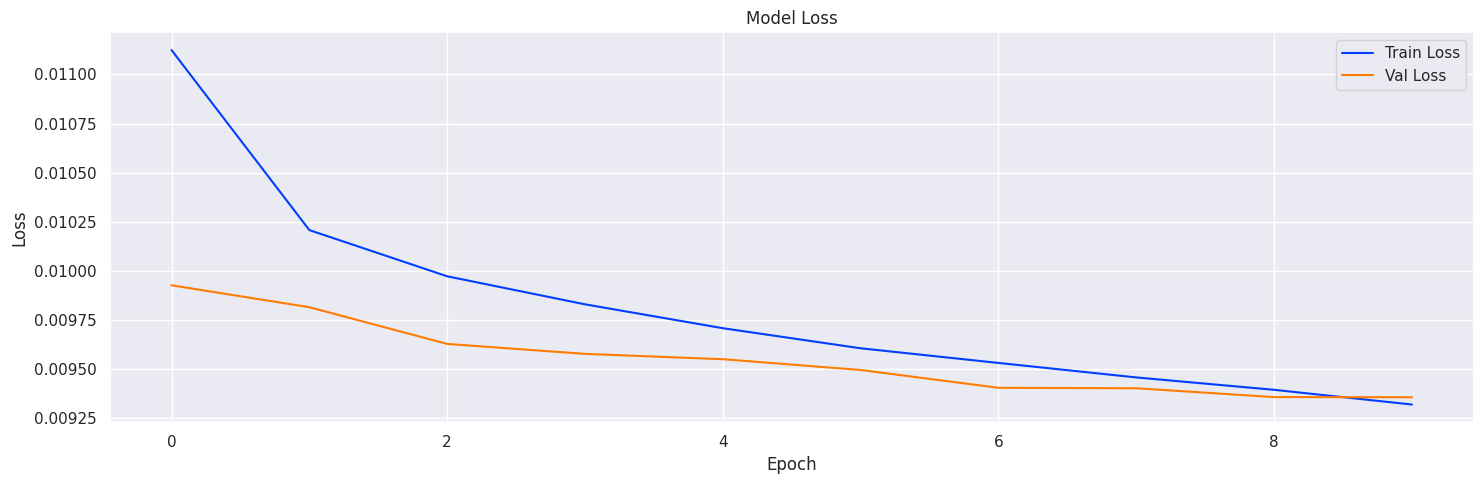

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for wider and deeper network: 8.6232


In [28]:
deep_revolut_model = DeepRevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=512).to(device)
optimizer = optim.Adam(deep_revolut_model.parameters(), lr=best_lr, weight_decay=best_wd)
criterion = nn.MSELoss()
epochs = 10

train(deep_revolut_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(deep_revolut_model, test_loader, y_test, device)
print(f"\nRMSE for wider and deeper network: {rmse:.4f}")

$RMSE$ для более глубокой и широкой сети равен 8.6232

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0113
Val Loss: 0.0101

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0098

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0097

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0096

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0095

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0096

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0094

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0094

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0094

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0093



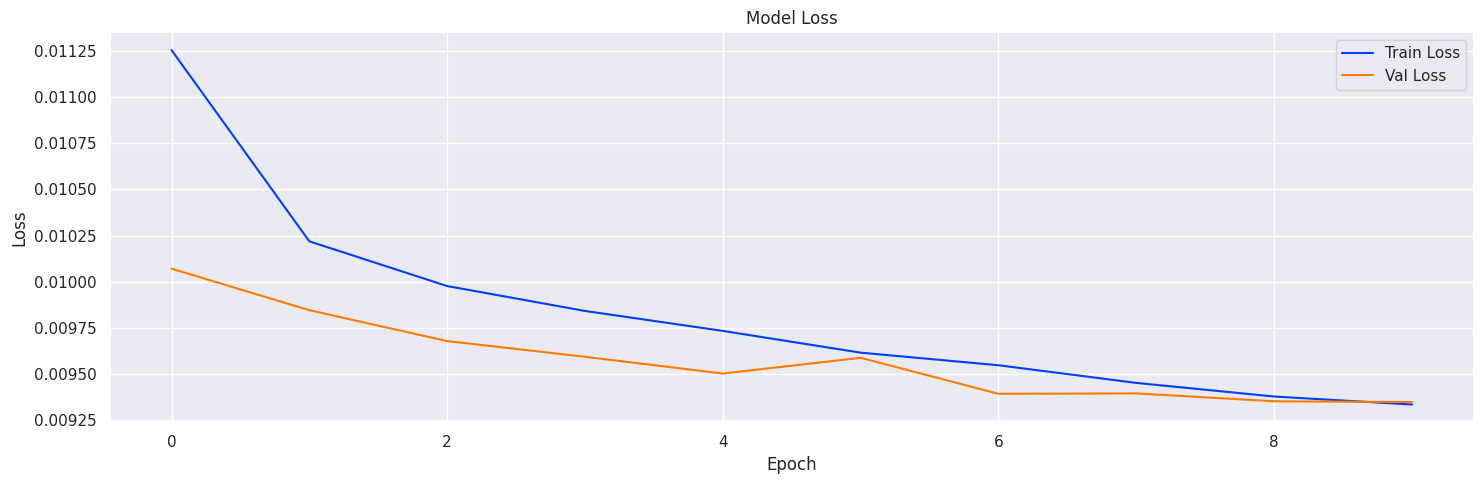

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for network with leaky relu: 8.6108


In [29]:
class LeakyReLURevolutNoodleFluxSigmoidNet(nn.Module):
    def __init__(self, in_features, out_features, hidden_size=512):
        super().__init__()
        self.f1 = nn.Linear(in_features, hidden_size)
        self.f2 = nn.Linear(hidden_size, hidden_size // 2)
        self.f3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.f4 = nn.Linear(hidden_size // 4, out_features)

        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.bn3 = nn.BatchNorm1d(hidden_size // 4)

        self.leaky_relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.f1(x)
        out = self.bn1(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out = self.f2(out)
        out = self.bn2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out = self.f3(out)
        out = self.bn3(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out = self.f4(out)
        out = self.sigmoid(out)
        return out

leaky_relu_model = LeakyReLURevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=512).to(device)
optimizer = optim.Adam(leaky_relu_model.parameters(), lr=best_lr, weight_decay=best_wd)
criterion = nn.MSELoss()
epochs = 10

train(leaky_relu_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(leaky_relu_model, test_loader, y_test, device)
print(f"\nRMSE for network with leaky relu: {rmse:.4f}")

$RMSE$ для сети с Leaky ReLU равен 8.6108

Epoch 1/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0111
Val Loss: 0.0100

Epoch 2/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0102
Val Loss: 0.0099

Epoch 3/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0100
Val Loss: 0.0098

Epoch 4/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0098
Val Loss: 0.0096

Epoch 5/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0097
Val Loss: 0.0096

Epoch 6/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0095

Epoch 7/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0096
Val Loss: 0.0095

Epoch 8/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0095
Val Loss: 0.0094

Epoch 9/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0094
Val Loss: 0.0093

Epoch 10/10
--------------------------------------------------


training:   0%|          | 0/9059 [00:00<?, ?it/s]

validation:   0%|          | 0/3020 [00:00<?, ?it/s]

Train Loss: 0.0093
Val Loss: 0.0094



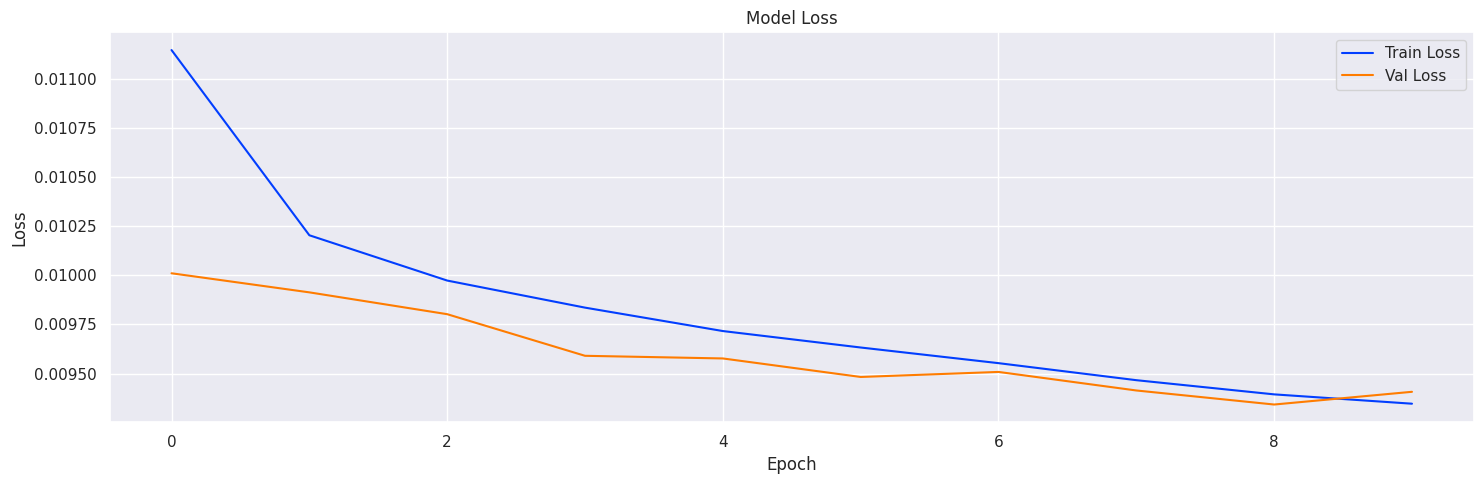

predicting:   0%|          | 0/4027 [00:00<?, ?it/s]


RMSE for network with AdamW optimizer: 8.6436


In [30]:
adamw_revolut_model = LeakyReLURevolutNoodleFluxSigmoidNet(in_features, out_features, hidden_size=512).to(device)
optimizer = optim.AdamW(adamw_revolut_model.parameters(), lr=best_lr, weight_decay=best_wd)
criterion = nn.MSELoss()
epochs = 10

train(adamw_revolut_model, optimizer, criterion, train_loader, val_loader, epochs, device)

rmse = compute_rmse(adamw_revolut_model, test_loader, y_test, device)
print(f"\nRMSE for network with AdamW optimizer: {rmse:.4f}")

$RMSE$ для сети c AdamW равен 8.6436

Опишите результаты экспериментов.

**Вывод:**

1. Сначала сделал сеть более глубокой. Добавил скрытый слой. Это не привело к существенному улучшению качества — $RMSE$ снизилось лишь незначительно (до $8.6596$), но стало чуть лучше. Это может указывать на то, что текущая модель уже достаточно выразительна для данного объёма данных, и дополнительная глубина не даёт прироста без изменения других гиперпараметров.

2. Дальше расширил сеть, увеличил число нейронов в слоях в 2 раза. Это дало небольшой, но наиболее заметный прирост: $RMSE$ снизилось до $8.6232$. Вероятно, модель получила больше параметров для аппроксимации зависимостей, не испытывая при этом переобучения.

3. Попробовал заменить ReLU на Leaky ReLU. Это дало небольшой эффект $(RMSE = 8.6108$ вместо $8.6232$ с обычным ReLU). Это говорит о том, что проблема "затухающих градиентов" здесь выражена слабо, и активация не является важным фактором качества. Но при этом чуть изменённая функция активации дала результат.

4. Использовал оптимизатор AdamW вместо Adam. Это дало хороший результат — $RMSE = 8.6436$. AdamW не показал результат лучше, хотя я ожидал, что станет получше. Скорее всего, это связано с тем, что ранее подбирали гиперпараметры именно для Adam, поэтому на нём метрики оказались лучше.

Итог: лучшей оказалась модель с 3 скрытыми слоями (512 $\rightarrow$ 256 $\rightarrow$ 128 $\rightarrow$ 1), с Batch Normalization, Dropout и функцией активации Leaky ReLU после всех слоёв, кроме последнего и функцией Softmax в самом конце и оптимизатором Adam с гиперпараметрами `learning_rate = 0.001` и `weight_decay = 0.0`.

**Итоговое качество:** $RMSE = 8.6108$.

## Бонус (0.1 балла)

Прикрепите фотографию того, как вы начали этот сентябрь. Какую самую классную эмоцию вы испытали за прошедший месяц?

<img src="https://github.com/vasyukov1/iad-deep-learning/blob/main/hw_01_base_nn/best_september_2025.jpg?raw=true" alt="meme" style="width: 500px;"/>

В общем, рассказываю о лучшем дне в сентябре: утром встретился со знакомой из Санкт-Петербурга, потом поехал на Покру, нашёл единственную свободную аудиторию, отсобеседовался в Яндекс Пэй (но ответ они так и не дали ещё 😭), дальше пошёл послушал консультацию по матану у лучшей асситентки, угостил детей чокопаем, а вечером прогулялись через пол-Москвы до Кофикс Бэкери, и вот фотка с прогулочки) 🙂